In [1]:
from collections import defaultdict
import numpy as np
import json
import glob, os, sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines

from cycler import cycler
from scipy.constants import golden_ratio

In [2]:
def get_fig_size(width=7,scale=2.0):
    #width = 3.36 # 242 pt
    base_size = np.array([1, 1/scale/golden_ratio])
    fig_size = width * base_size
    return(fig_size)
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = get_fig_size()
#mpl.rcParams['text.usetex'] = True
mpl.rc('font',**{'family':'serif','serif':['Times']})
#TexManager.font_info['iwona'] = ('iwona', r'\usepackage{iwona}')
#mpl.rcParams['font.serif'] = 'Times'
mpl.rcParams['lines.linewidth'] = 1.3
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 8
color_cycle_wong = ['#000000','#E69F00','#009E73','#56B4E9','#0072B2','#F0E442','#D55E00','#CC79A7']
mpl.rcParams['axes.prop_cycle'] = cycler(color=color_cycle_wong)

The stuff below will probably need to be changed for your own paths to the timing data

In [3]:
current_path = os.getcwd()
splt_path = current_path.split("/")
top_path_idx = splt_path.index("akaiser")
top_dir = "/".join(splt_path[0 : top_path_idx + 1])
print(top_dir)
#save_dir = current_path + '/Figures/px_plots'

/hyrule/data/users/akaiser


`f = np.loadtxt('Parallaxes.txt', dtype = 'str', delimiter = '\n')`

Construct px dictionary

```
px_dict = {}
old_name = 'None'
new_name = 'New None'
for x in f:
    split_1 = x.split(' ')
    if split_1[0] == '!!psr':
        old_name = new_name
        
    if split_1[0] == 'JName':
        new_name = split_1[-1]
        px_dict[split_1[-1]] = defaultdict(list)
        
    if old_name != new_name:
        if split_1[0] == 'BName':
            if split_1[-1] != '=':
                px_dict[new_name][split_1[0]] = split_1[-1]
            else:
                px_dict[new_name][split_1[0]] = 'None'

        if 'PI' not in px_dict[new_name].keys():
            if split_1[0] in ['PI','eplus','eminus','RefURL']:
                px_dict[new_name][split_1[0]] = [split_1[-1]]
            elif split_1[0] == 'Refname':
                px_dict[new_name][split_1[0]] = [(' ').join(split_1[2:])]
            elif split_1[0] == 'Method':
                px_dict[new_name][split_1[0]] = [(' ').join(split_1[3:])]
        else:
            if split_1[0] in ['PI','eplus','eminus','RefURL']:
                px_dict[new_name][split_1[0]].append(split_1[-1])
            elif split_1[0] == 'Refname':
                px_dict[new_name][split_1[0]].append((' ').join(split_1[2:]))
            elif split_1[0] == 'Method':
                px_dict[new_name][split_1[0]].append((' ').join(split_1[3:]))

print(px_dict.keys())
```

```
with open('parallaxes.json', 'w') as fp:
    json.dump(px_dict, fp, sort_keys=True, indent=4)
```

In [4]:
astrometric_px_file = 'parallaxes.json'
astrometric_px = {}
with open(astrometric_px_file, 'r') as pxf:
    astrometric_px = json.load(pxf)
    pxf.close()

In [5]:
print(astrometric_px.keys())

dict_keys(['J0030+0451', 'J0034-0721', 'J0040+5716', 'J0045-7319', 'J0055+5117', 'J0102+6537', 'J0108+6608', 'J0108-1431', 'J0139+5814', 'J0147+5922', 'J0151-0635', 'J0152-1637', 'J0157+6212', 'J0218+4232', 'J0323+3944', 'J0332+5434', 'J0335+4555', 'J0337+1715', 'J0357+5236', 'J0358+5413', 'J0406+6138', 'J0437-4715', 'J0452-1759', 'J0454+5543', 'J0538+2817', 'J0601-0527', 'J0613-0200', 'J0614+2229', 'J0629+2415', 'J0630-2834', 'J0633+1746', 'J0636+5129', 'J0645+5158', 'J0659+1414', 'J0720-3125', 'J0729-1836', 'J0737-3039A/B', 'J0751+1807', 'J0814+7429', 'J0820-1350', 'J0823+0159', 'J0826+2637', 'J0835-4510', 'J0922+0638', 'J0953+0755', 'J1012+5307', 'J1017-7156', 'J1022+1001', 'J1023+0038', 'J1024-0719', 'J1045-4509', 'J1048+2339', 'J1136+1551', 'J1227-4853', 'J1239+2453', 'J1257-1027', 'J1300+1240', 'J1302-6350', 'J1321+8323', 'J1417-4402', 'J1431-4715', 'J1455-3330', 'J1456-6843', 'J1509+5531', 'J1532+2745', 'J1537+1155', 'J1543+0929', 'J1543-0620', 'J1559-4438', 'J1600-3053', 'J1607

# 5yr pxs

In [6]:
parfiles_5yr = sorted(glob.glob(top_dir + "/5yr/par/*.par"))
px_par_5yr = {}
for pf in parfiles_5yr:
    psr = pf.split('/')[-1].split('_')[0]
    px_par_5yr[psr] = {}
    with open(pf,'r') as file:
        for lines in file:
            splt_line = lines.split()
            if 'PX' in splt_line:
                px_par_5yr[psr]['val'] = np.float128(splt_line[1])
                px_par_5yr[psr]['err'] = np.float128(splt_line[-1])

# 9yr pxs

In [7]:
parfiles_9yr = sorted(glob.glob(top_dir + "/9yr/par/*.par"))
px_par_9yr = {}
for pf in parfiles_9yr:
    psr = pf.split('/')[-1].split('_')[0]
    px_par_9yr[psr] = {}
    with open(pf,'r') as file:
        for lines in file:
            splt_line = lines.split()
            if 'PX' in splt_line:
                px_par_9yr[psr]['val'] = np.float128(splt_line[1])
                px_par_9yr[psr]['err'] = np.float128(splt_line[-1])

# 11yr pxs

In [8]:
parfiles_11yr = sorted(glob.glob(top_dir + "/11yr/par/*.par"))
px_par_11yr = {}
for pf in parfiles_11yr:
    psr = pf.split('/')[-1].split('_')[0]
    px_par_11yr[psr] = {}
    with open(pf,'r') as file:
        for lines in file:
            splt_line = lines.split()
            if 'PX' in splt_line:
                px_par_11yr[psr]['val'] = np.float128(splt_line[1])
                px_par_11yr[psr]['err'] = np.float128(splt_line[-1])

# 12.5yr pxs

In [9]:
parfiles_12p5yr = sorted(glob.glob(top_dir + "/12p5yr/par/*.par"))
px_par_12p5yr = {}
for pf in parfiles_12p5yr:
    psr = pf.split('/')[-1].split('_')[0]
    px_par_12p5yr[psr] = {}
    with open(pf,'r') as file:
        for lines in file:
            splt_line = lines.split()
            if 'PX' in splt_line:
                px_par_12p5yr[psr]['val'] = np.float128(splt_line[1])
                px_par_12p5yr[psr]['err'] = np.float128(splt_line[-1])

# Plots

In [10]:
all_psrs = []
for psr in px_par_12p5yr.keys():
    all_psrs.append(psr)
for psr in px_par_5yr.keys():
    if psr not in all_psrs:
        print('5yr',psr)
        all_psrs.append(psr)
for psr in px_par_9yr.keys():
    if psr not in all_psrs:
        print('9yr',psr)
        all_psrs.append(psr)
for psr in px_par_11yr.keys():
    if psr not in all_psrs:
        print('11yr',psr)
        all_psrs.append(psr)

5yr J1853+1308
9yr J1949+3106


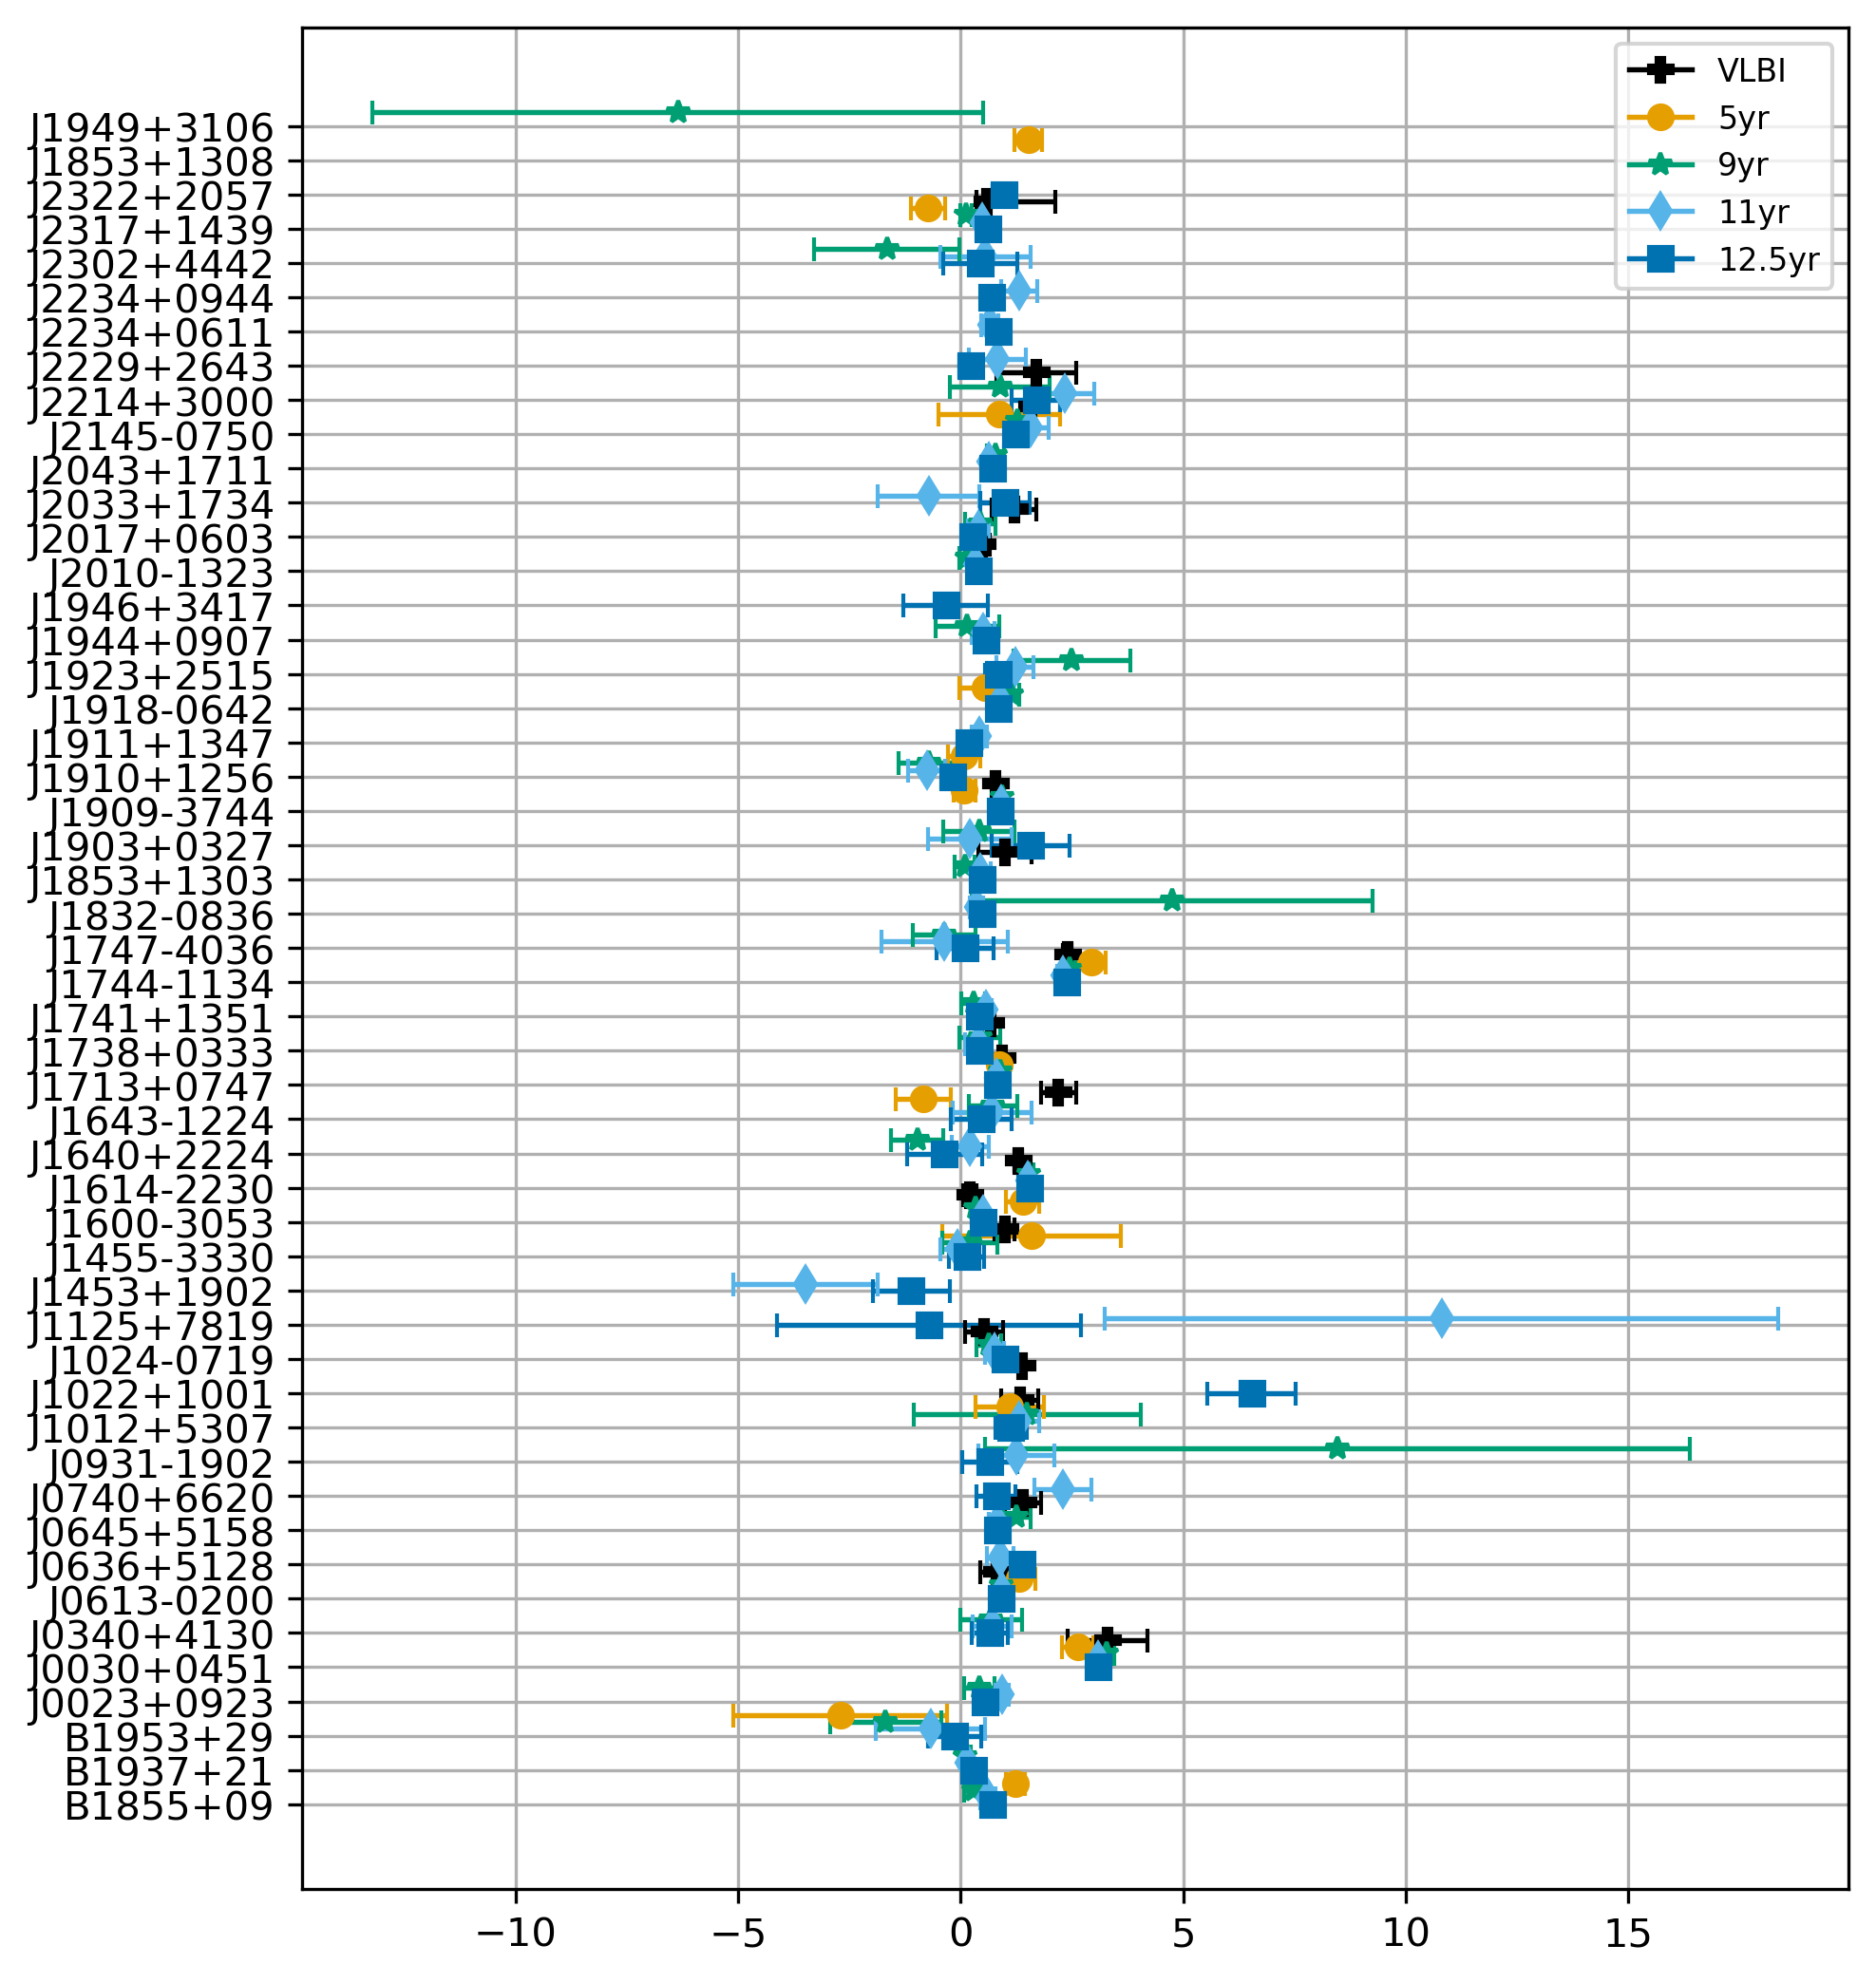

In [12]:
plt.figure(figsize=get_fig_size(scale=.5))
capsize = 3
plotted_psrs = []
i = 0
for i,psr in enumerate(all_psrs):
    if psr in astrometric_px.keys():
        plt.errorbar(float(astrometric_px[psr]['PI'][0]),i+.8,
                     xerr=[np.array([np.abs(float(astrometric_px[psr]['eminus'][0]))]),
                           [np.abs(float(astrometric_px[psr]['eplus'][0]))]],
                     fmt = 'P', capsize = capsize, color = 'C0',label='VLBI')
    if psr in px_par_5yr.keys():
        if 'val' in px_par_5yr[psr].keys() and 'err' in px_par_5yr[psr].keys():
            plt.errorbar(px_par_5yr[psr]['val'],i+.6,xerr=px_par_5yr[psr]['err'],
                         fmt = 'o', capsize = capsize, color = 'C1',label='5yr')
    if psr in px_par_9yr.keys():
        if 'val' in px_par_9yr[psr].keys() and 'err' in px_par_9yr[psr].keys():
            plt.errorbar(px_par_9yr[psr]['val'],i+.4,xerr=px_par_9yr[psr]['err'],
                         fmt = '*', capsize = capsize, color = 'C2',label='9yr')
    if psr in px_par_11yr.keys():
        if 'val' in px_par_11yr[psr].keys() and 'err' in px_par_11yr[psr].keys():
            plt.errorbar(px_par_11yr[psr]['val'],i+.2,xerr=px_par_11yr[psr]['err'],
                         fmt = 'd', capsize = capsize, color = 'C3',label='11yr')
    if psr in px_par_12p5yr.keys():
        if 'val' in px_par_12p5yr[psr].keys() and 'err' in px_par_12p5yr[psr].keys():
            plt.errorbar(px_par_12p5yr[psr]['val'],i,xerr=px_par_12p5yr[psr]['err'],
                         fmt = 's', capsize = capsize, color = 'C4',label='12.5yr')

line1 = mlines.Line2D([], [], color='C0', marker='P', label='VLBI')
line2 = mlines.Line2D([], [], color='C1', marker='o', label='5yr')
line3 = mlines.Line2D([], [], color='C2', marker='*', label='9yr')
line4 = mlines.Line2D([], [], color='C3', marker='d', label='11yr')
line5 = mlines.Line2D([], [], color='C4', marker='s', label='12.5yr')

plt.legend(handles=[line1,line2,line3,line4,line5])
plt.yticks(np.arange(0,len(all_psrs)), all_psrs)
plt.grid(True, which = 'both')
#plt.savefig(save_dir+'/all_parallaxes.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [13]:
print(px_par_5yr['B1855+09'])

{'val': 1.2288569063263405232, 'err': 0.21243361289239687251}


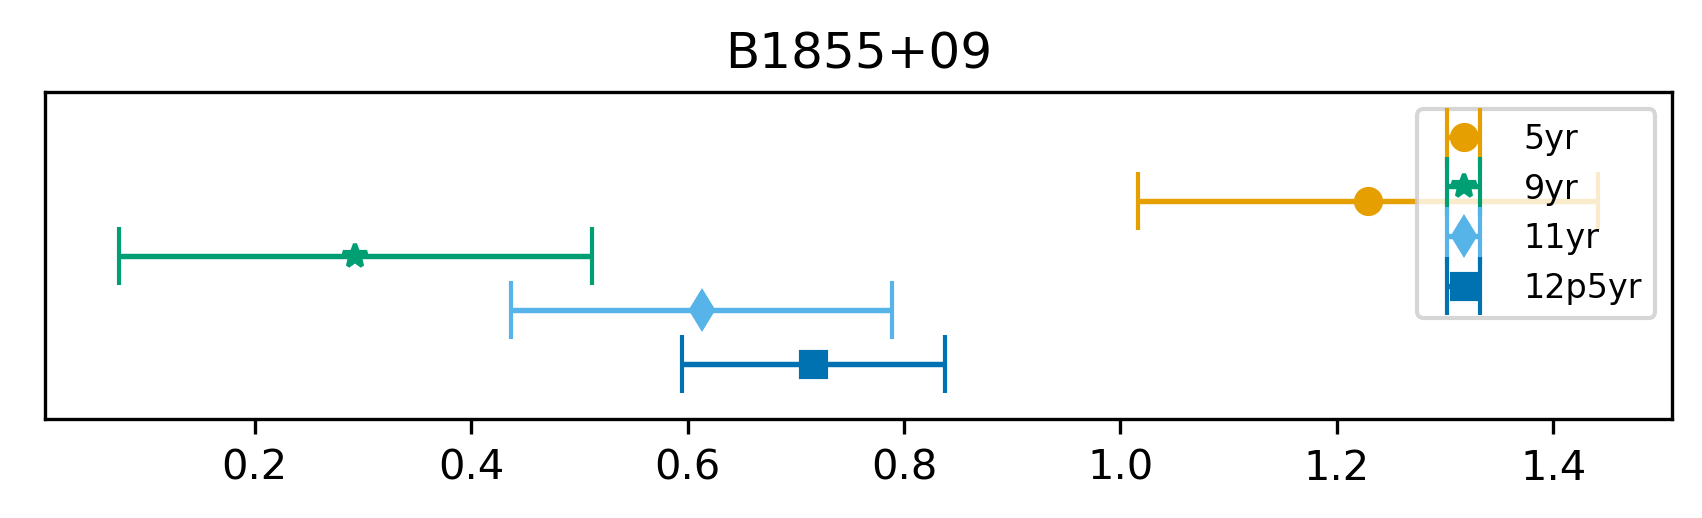

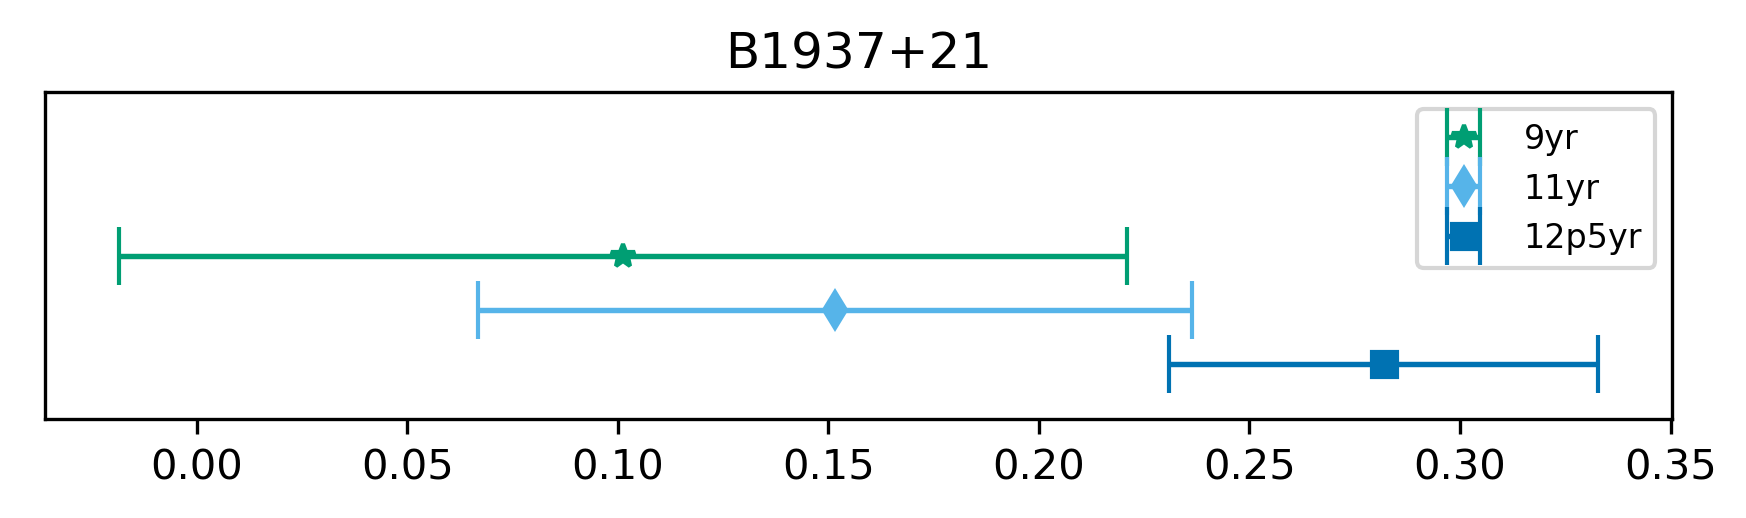

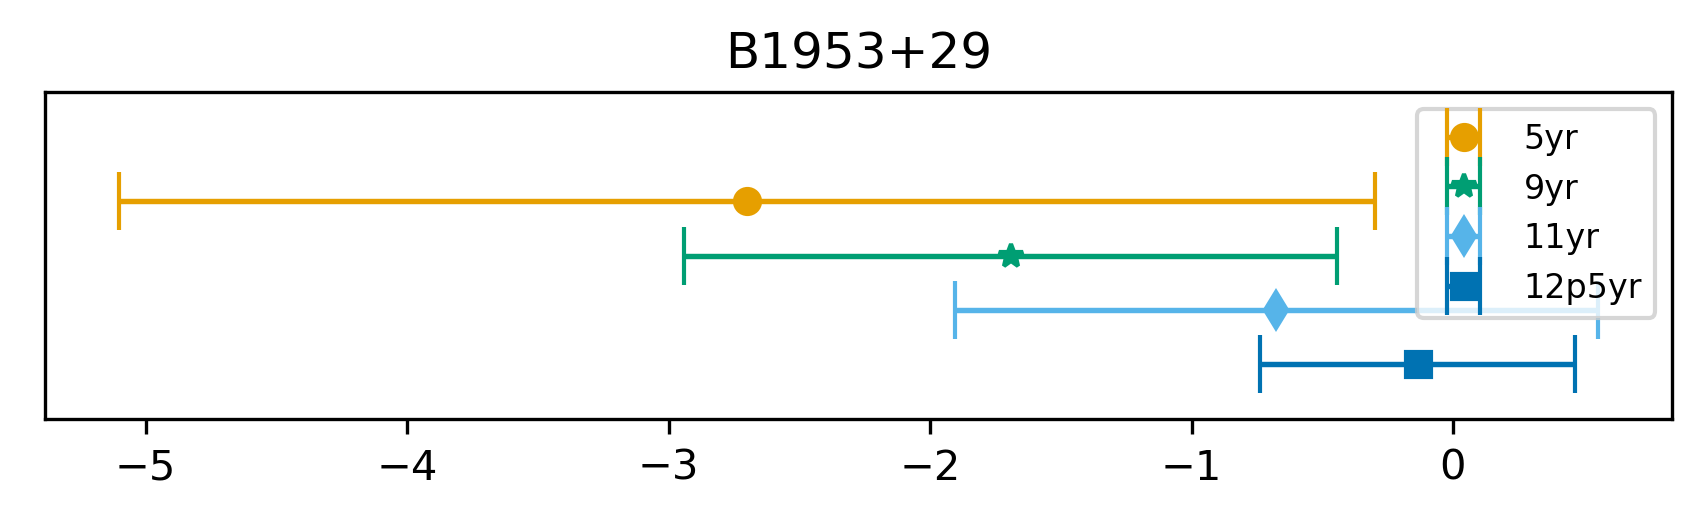

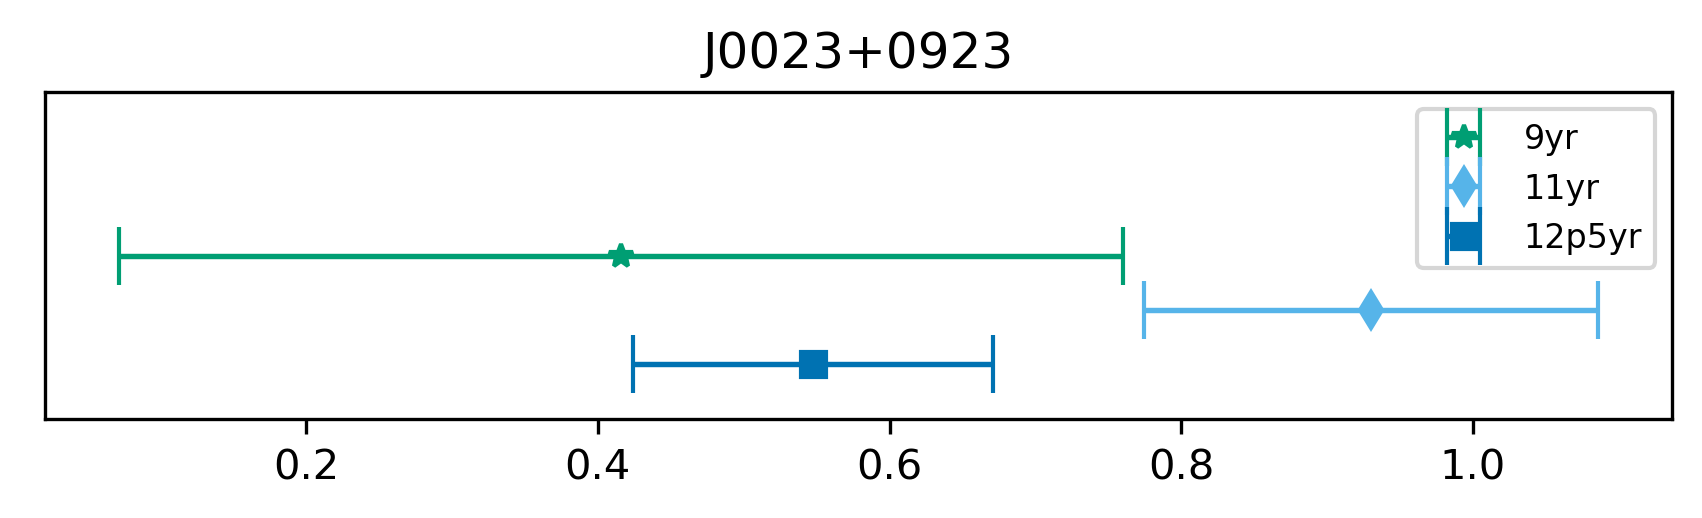

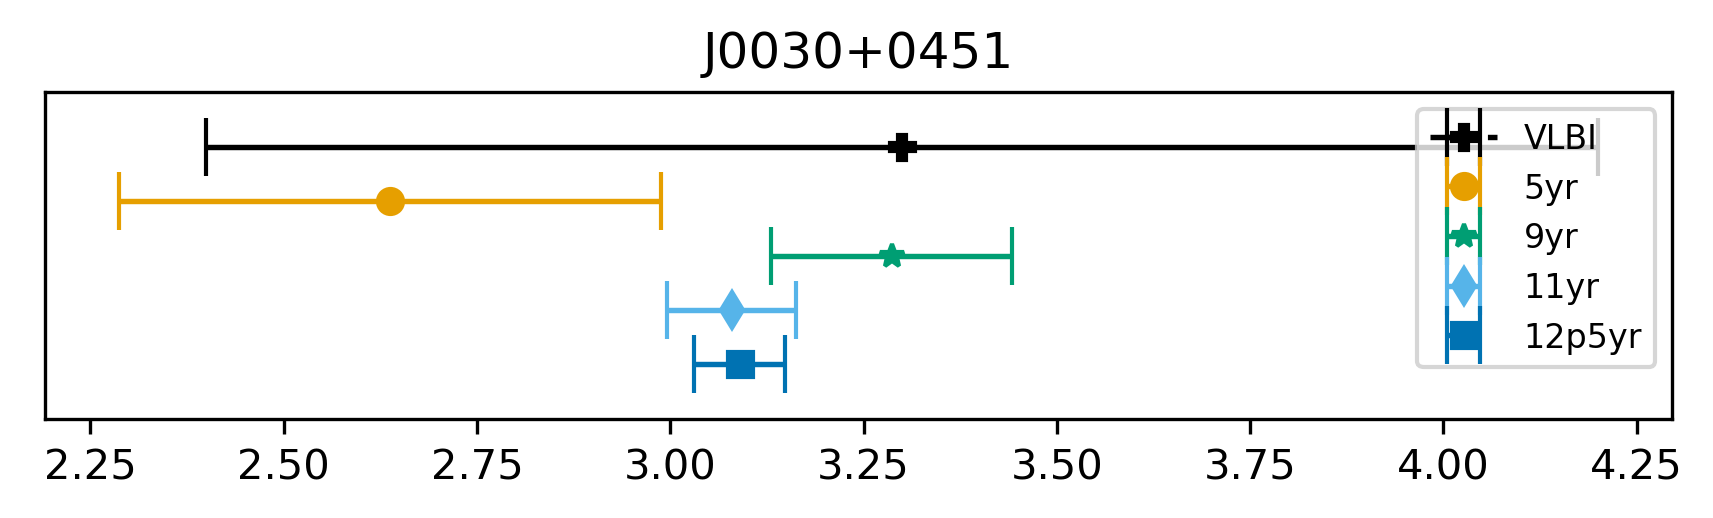

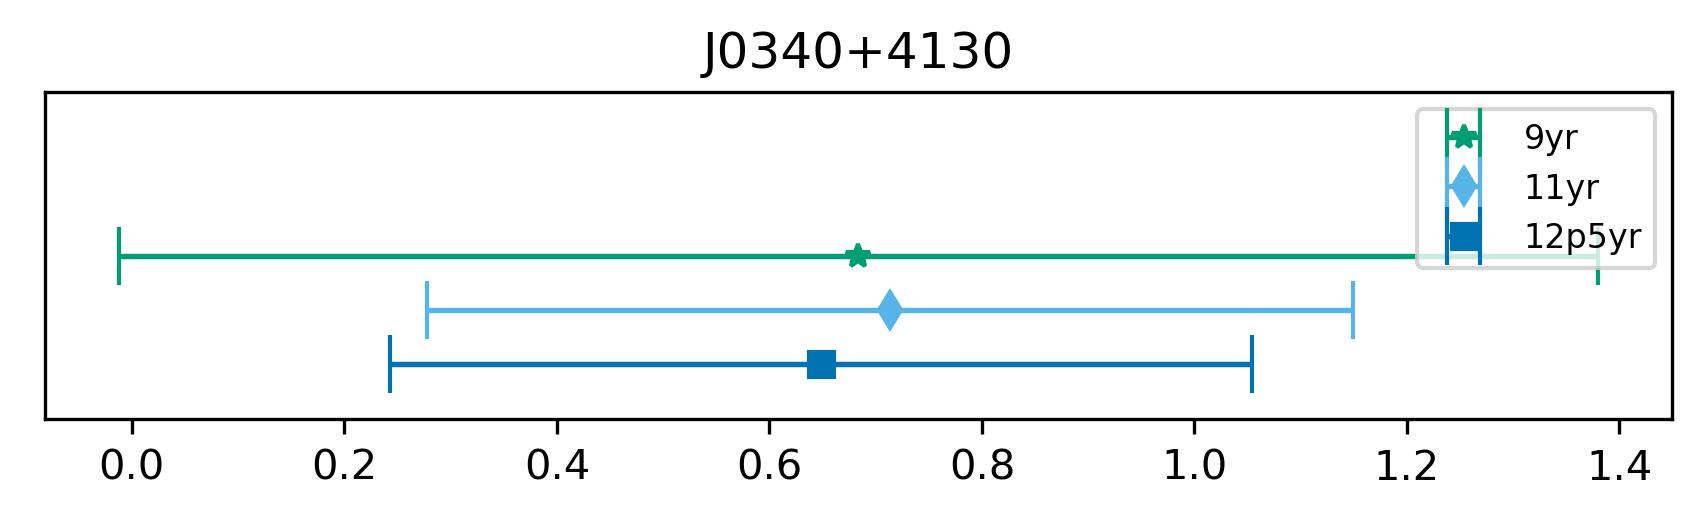

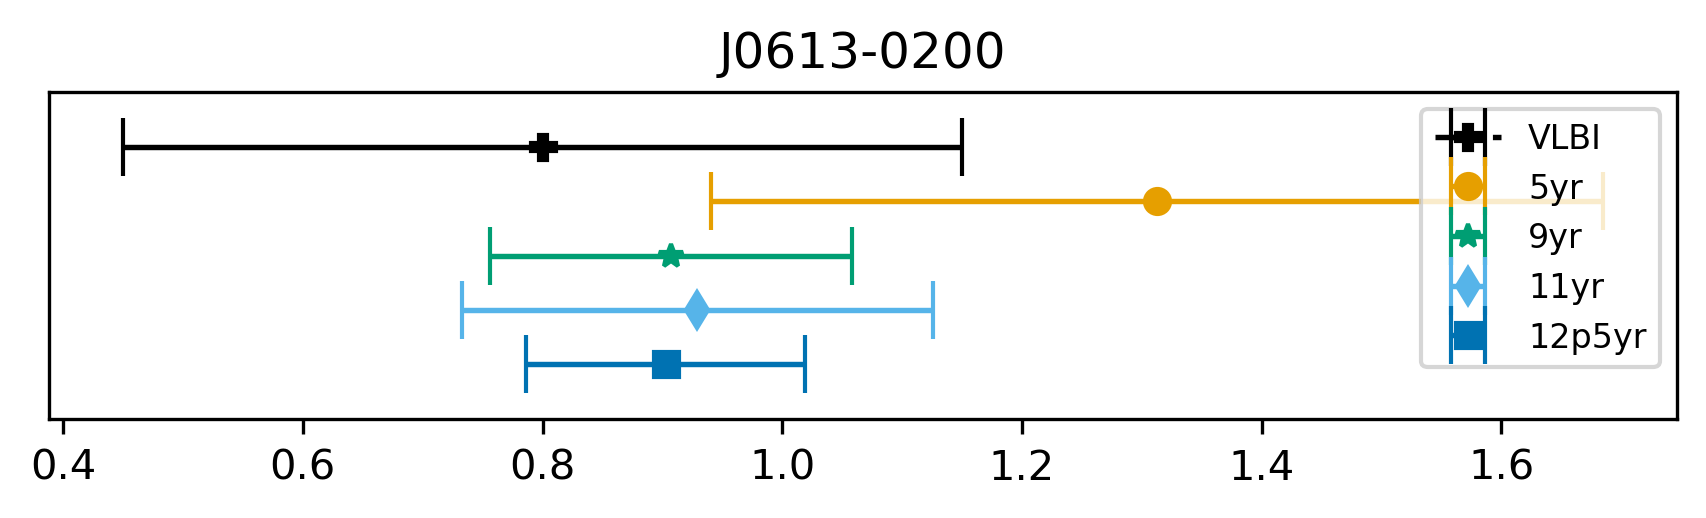

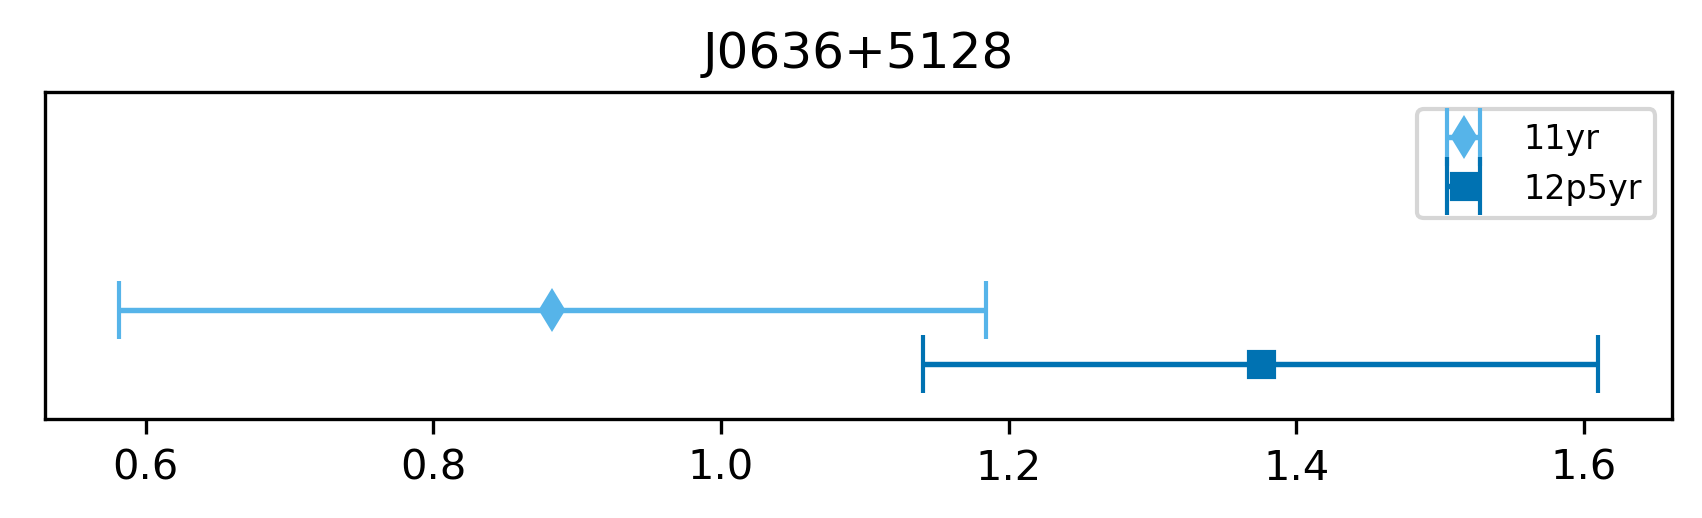

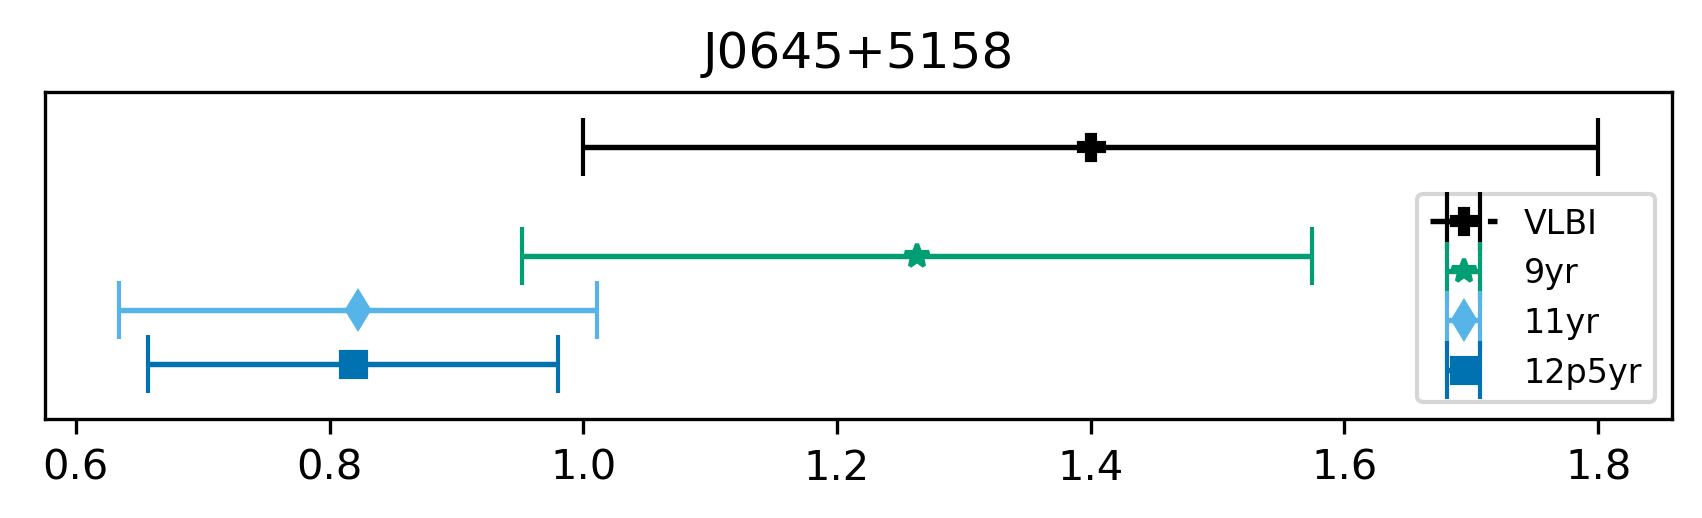

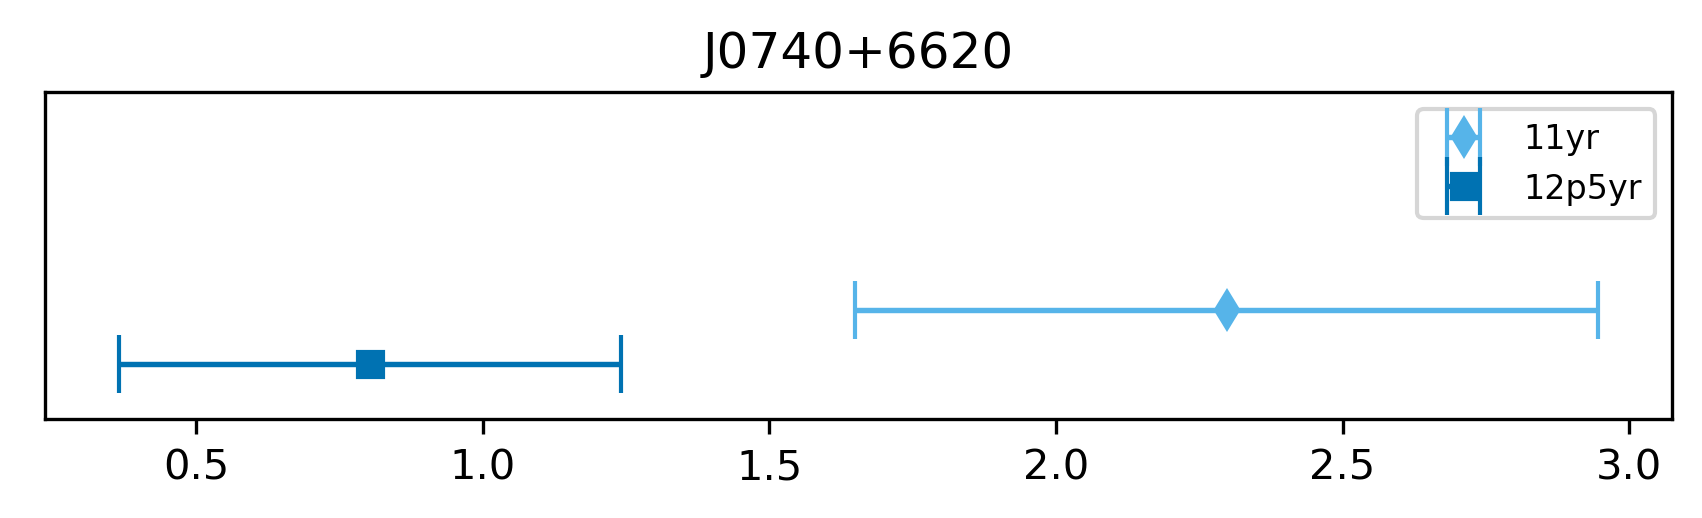

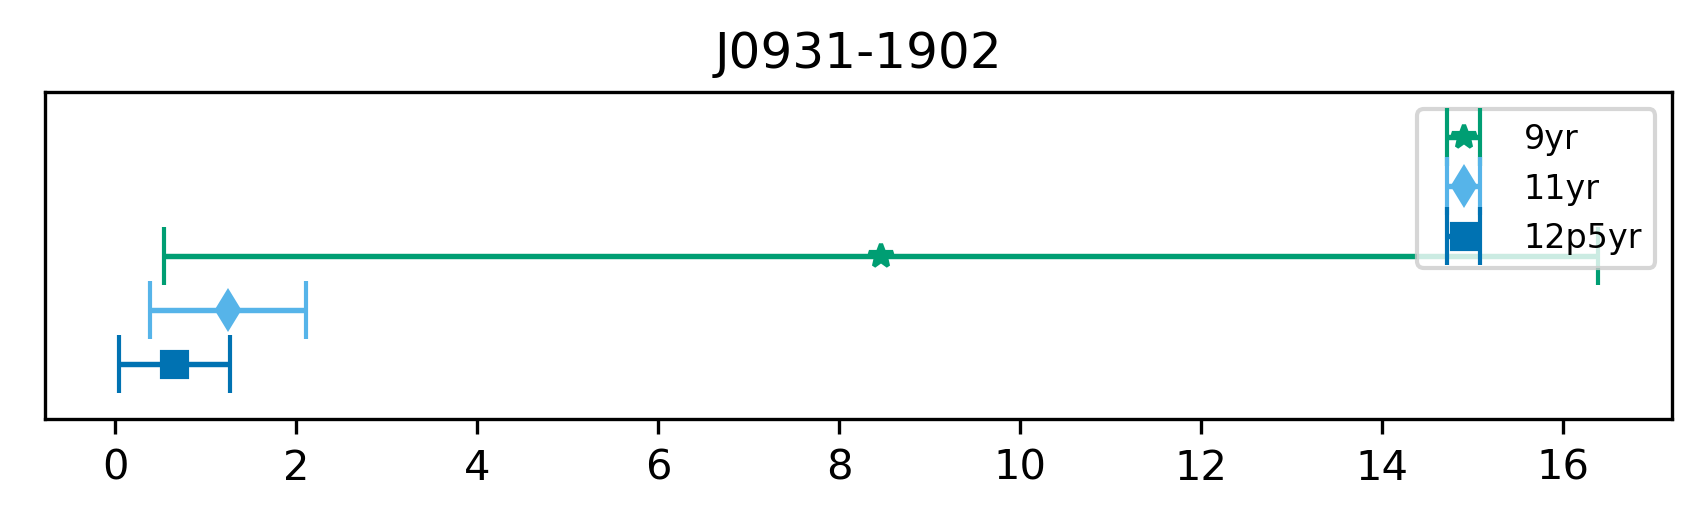

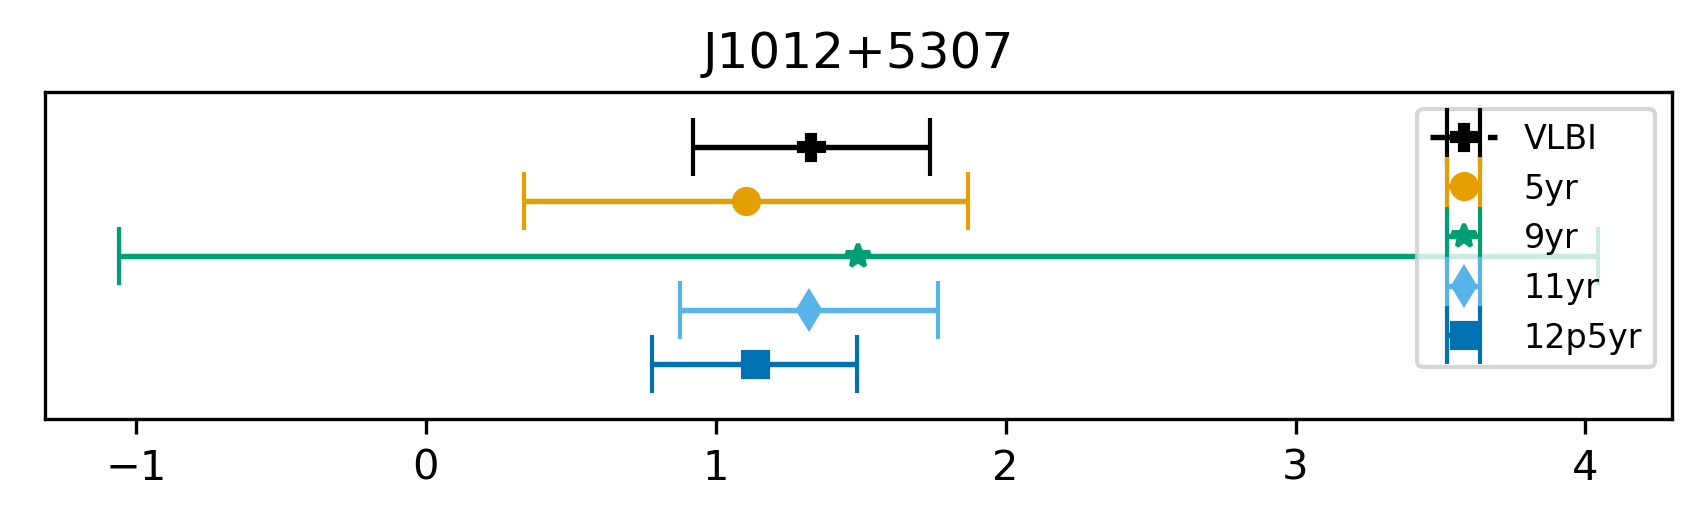

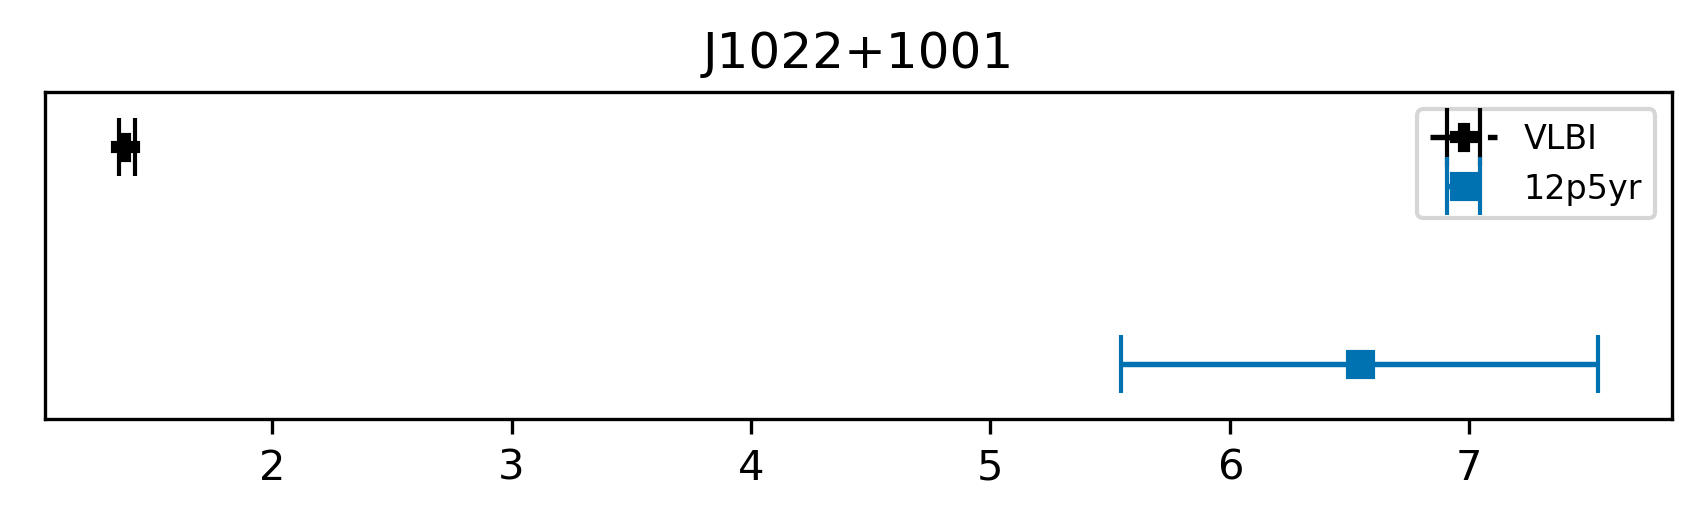

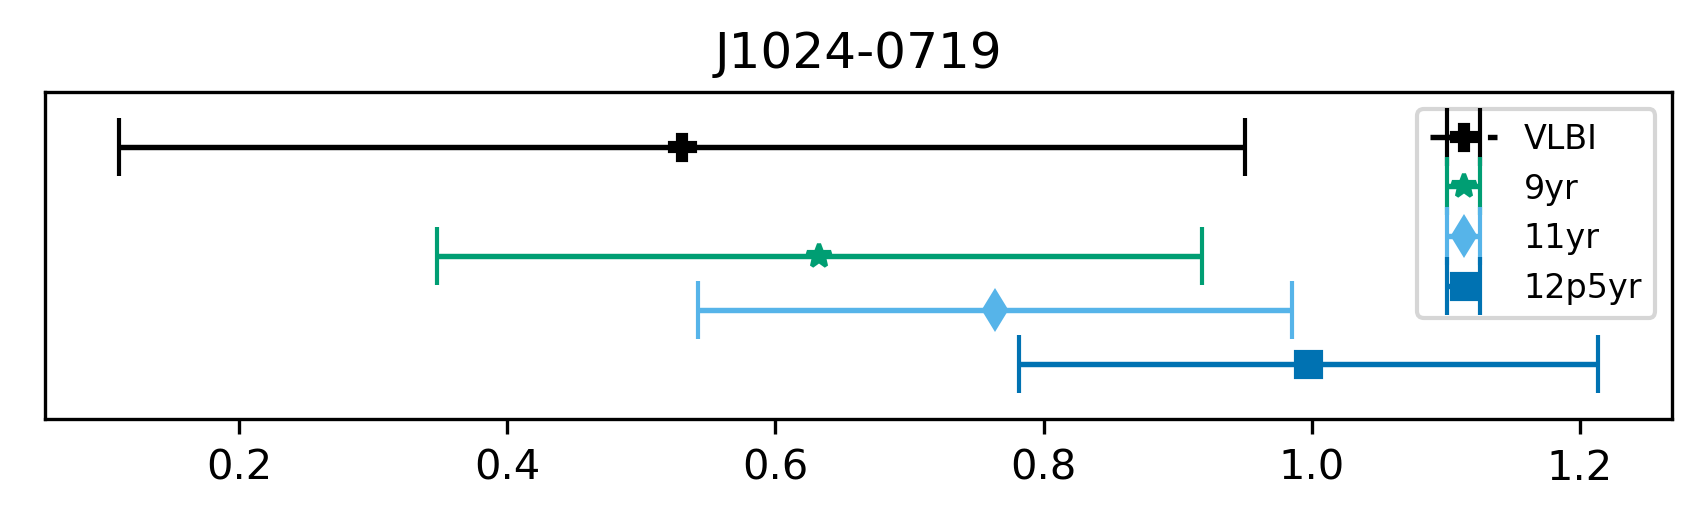

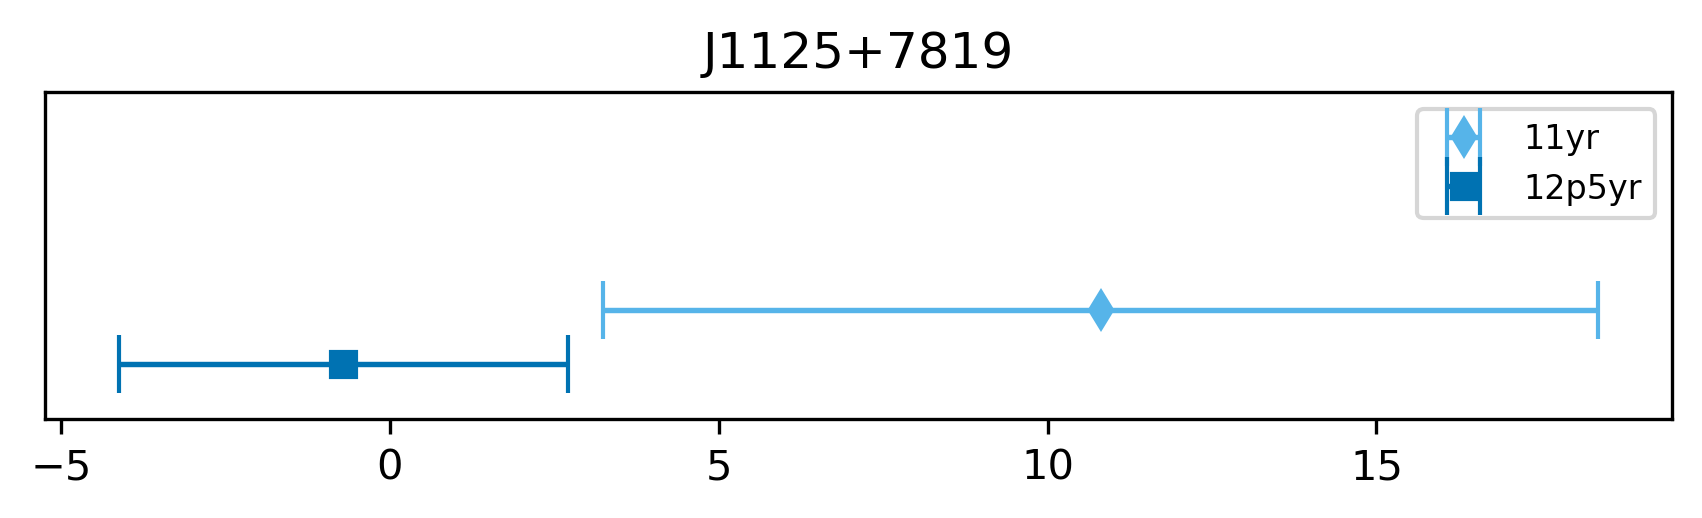

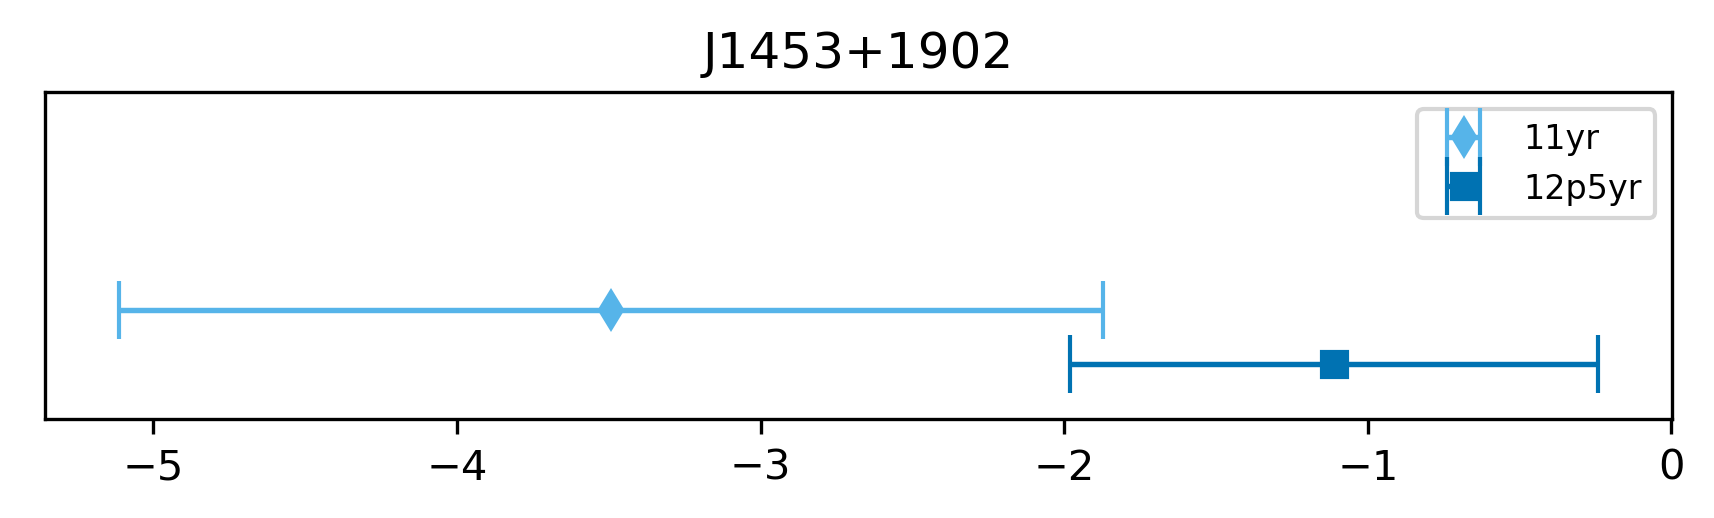

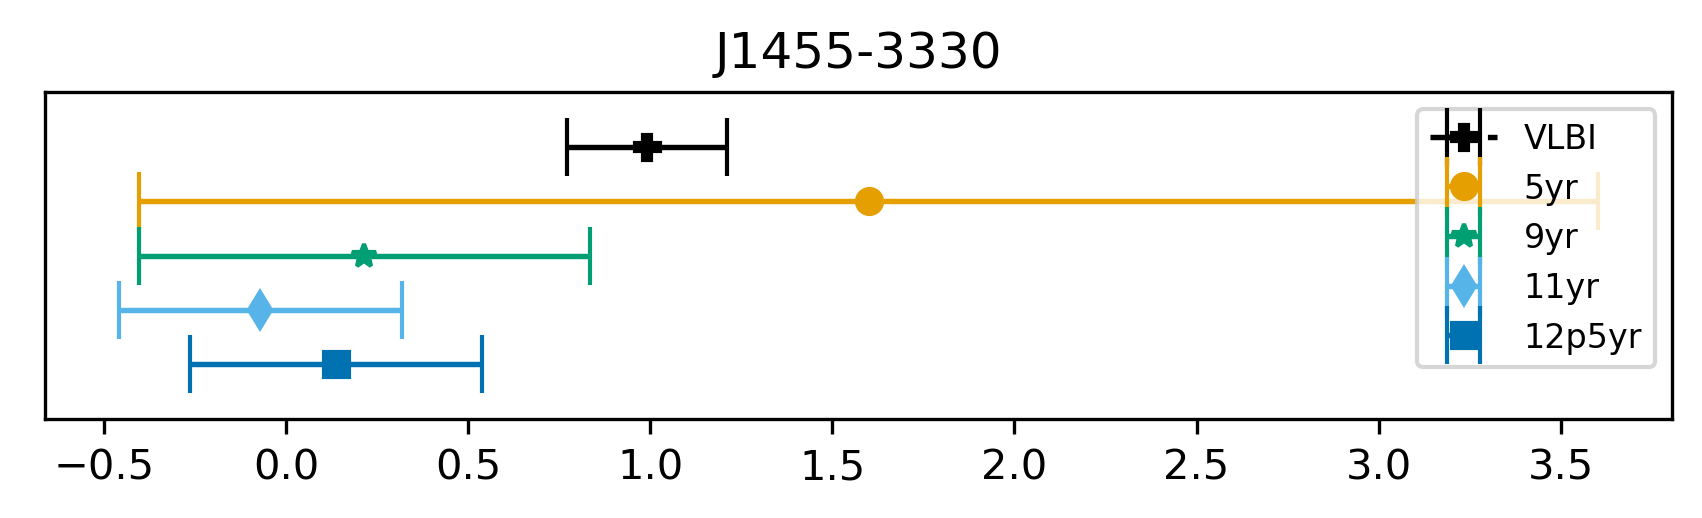

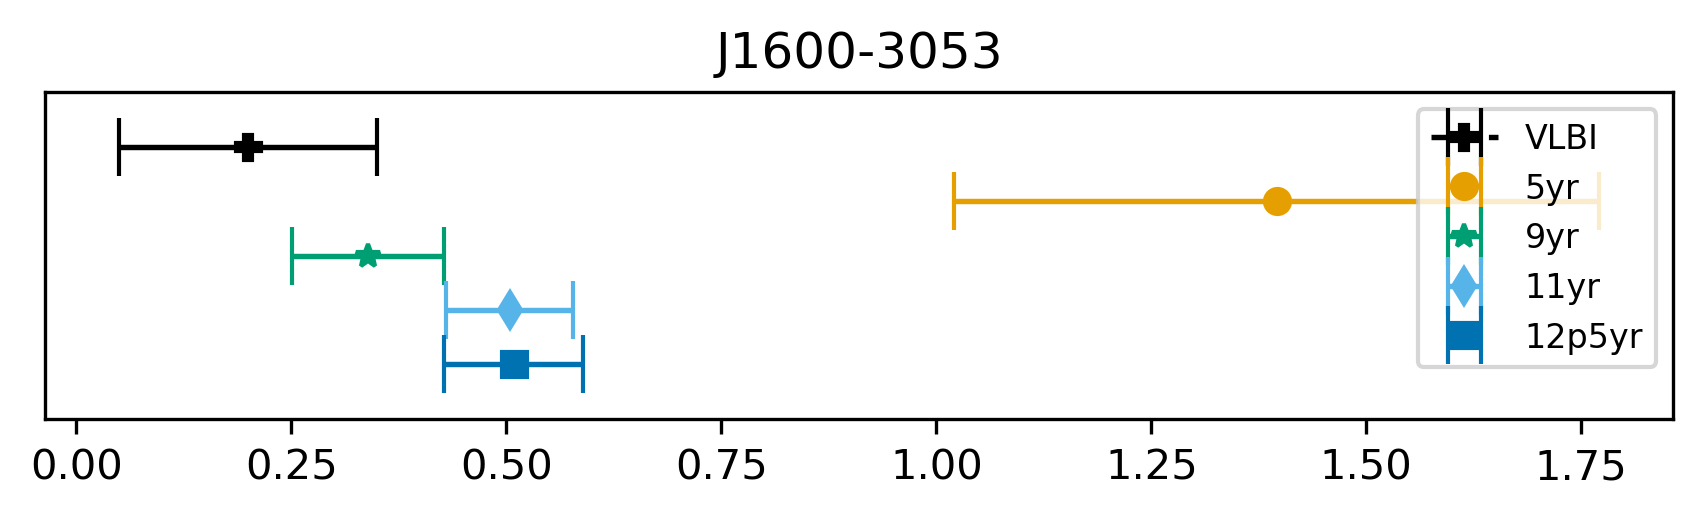

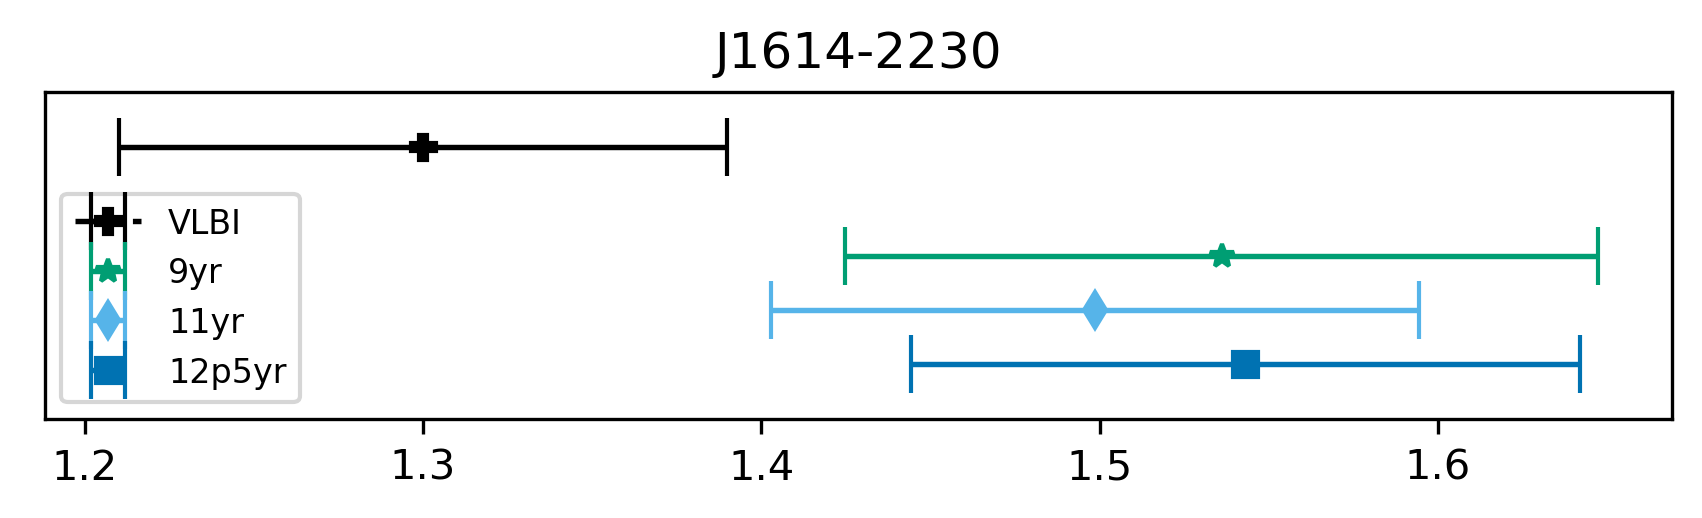

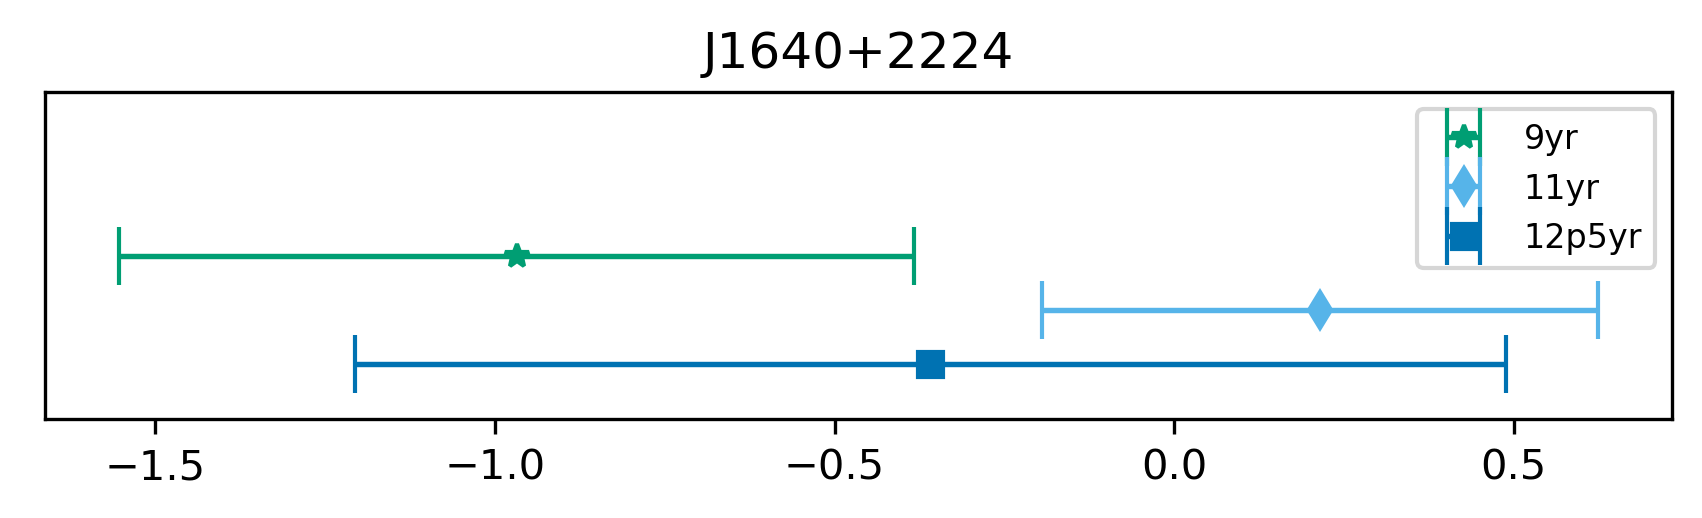

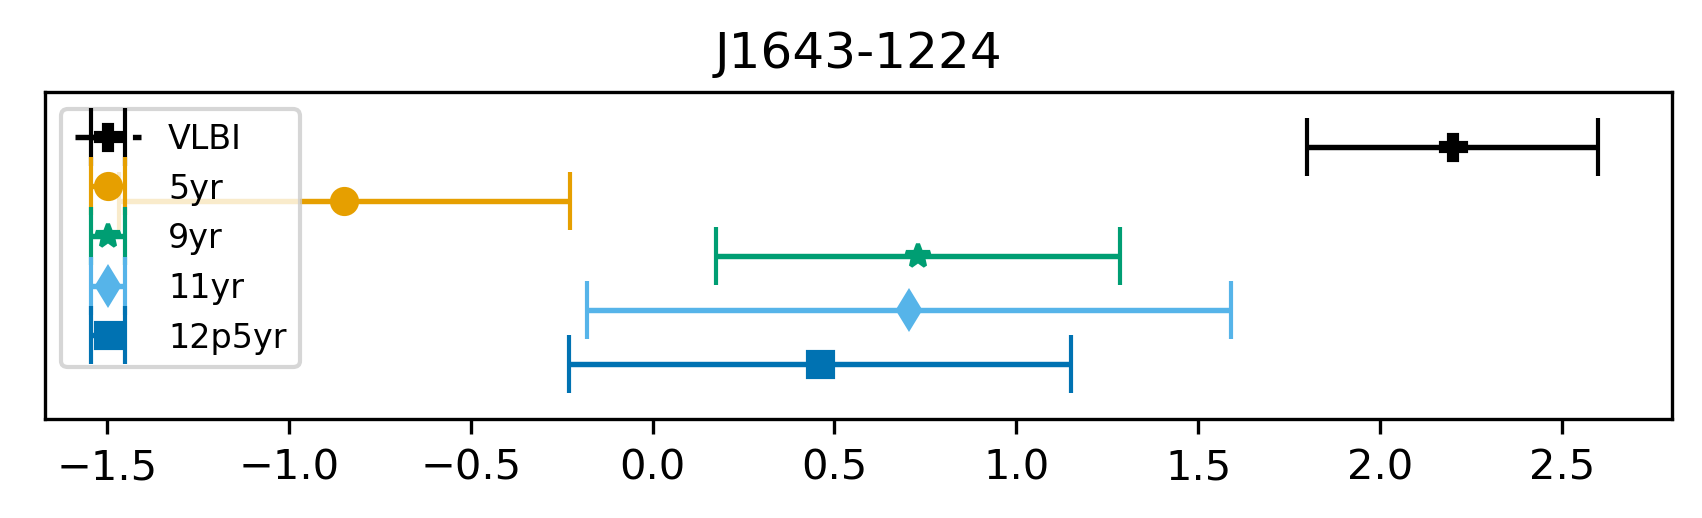

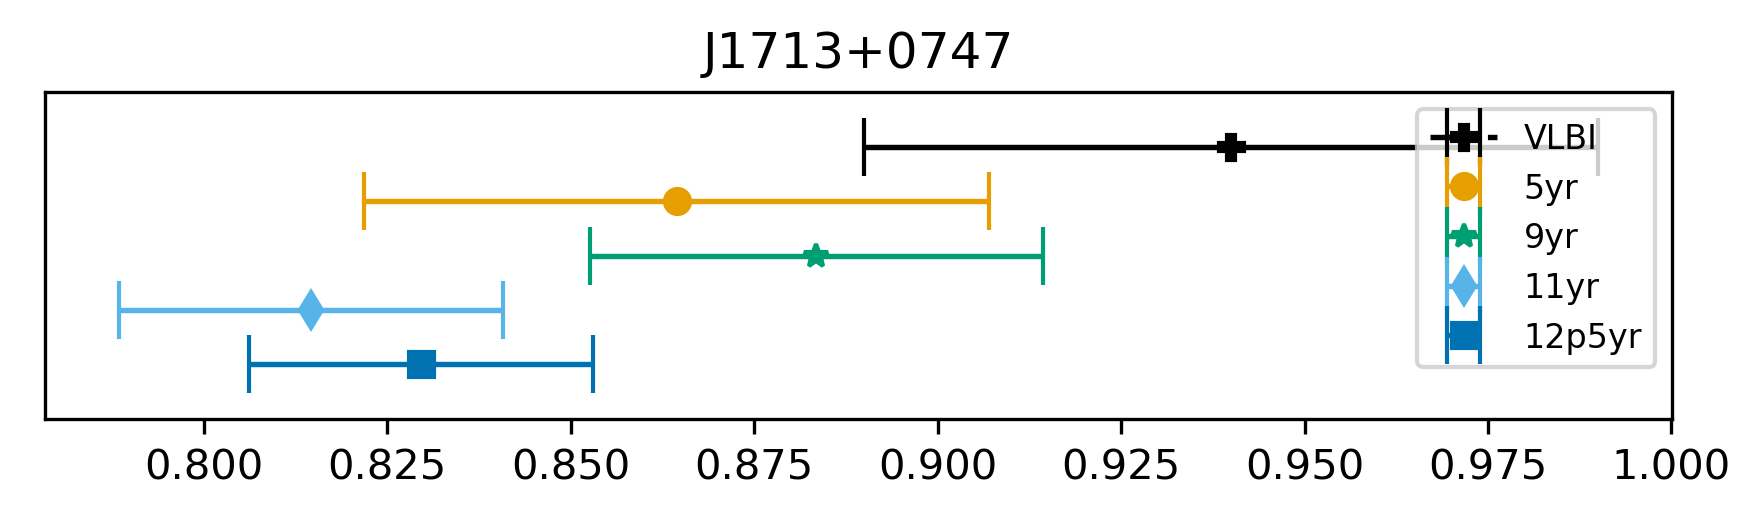

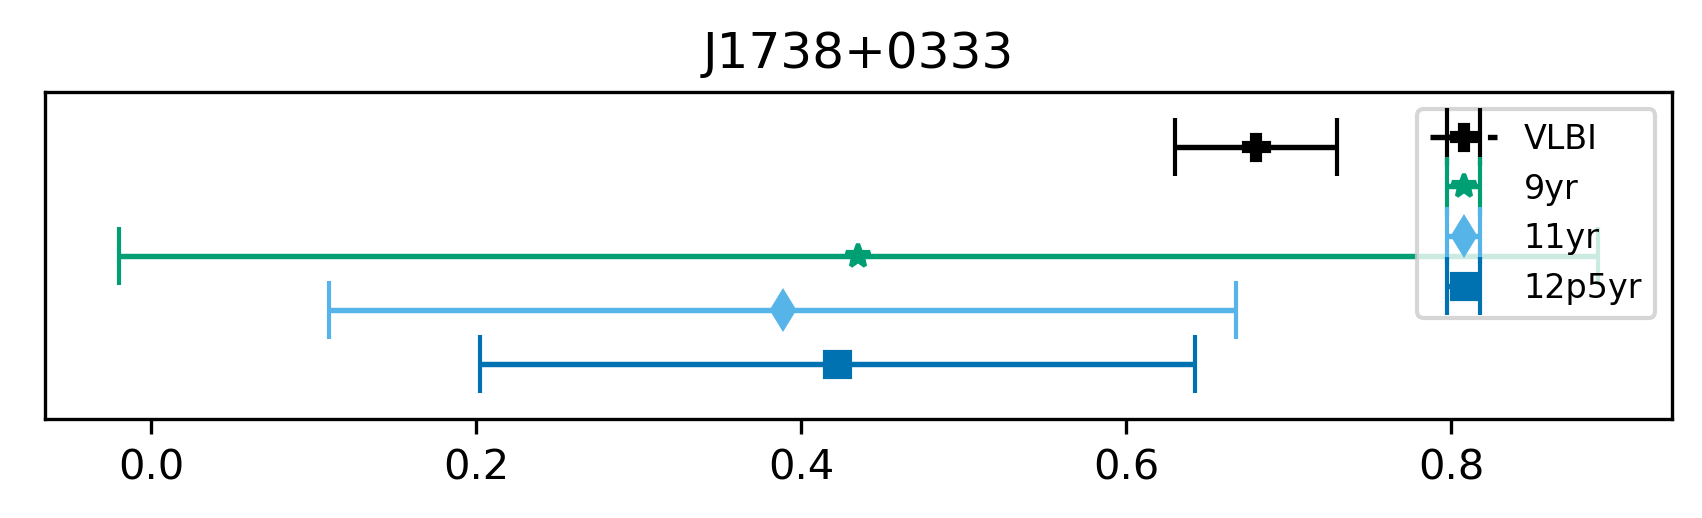

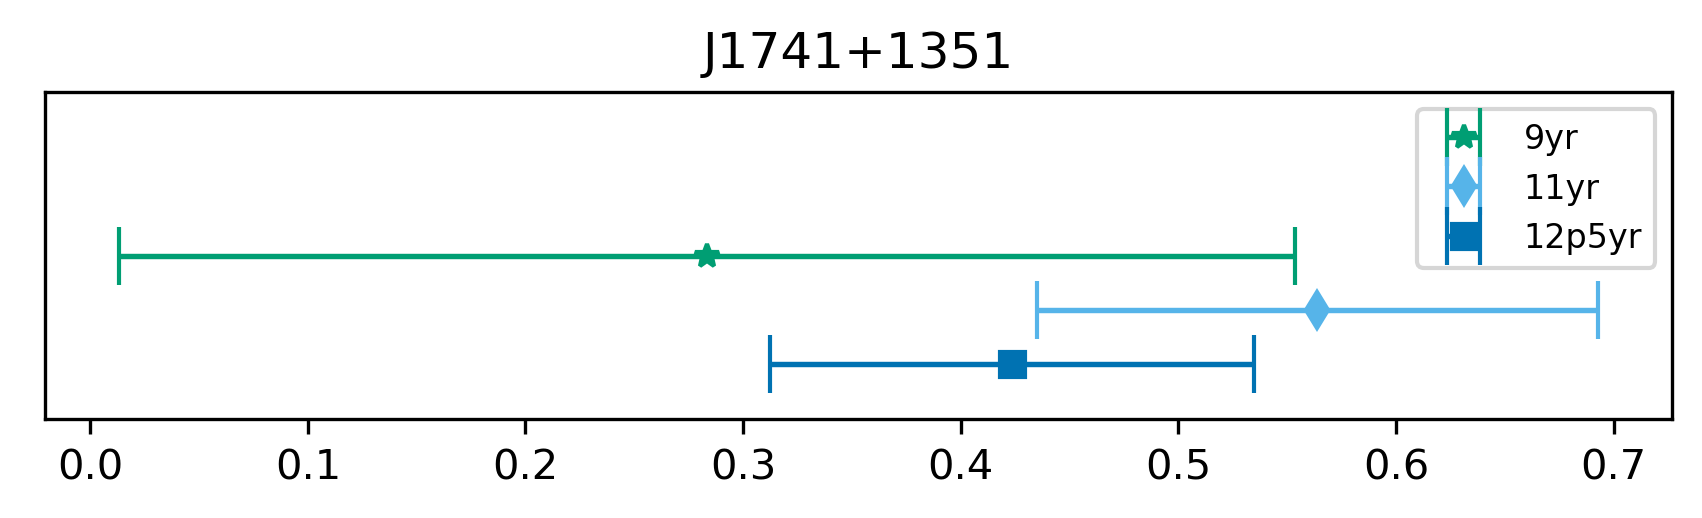

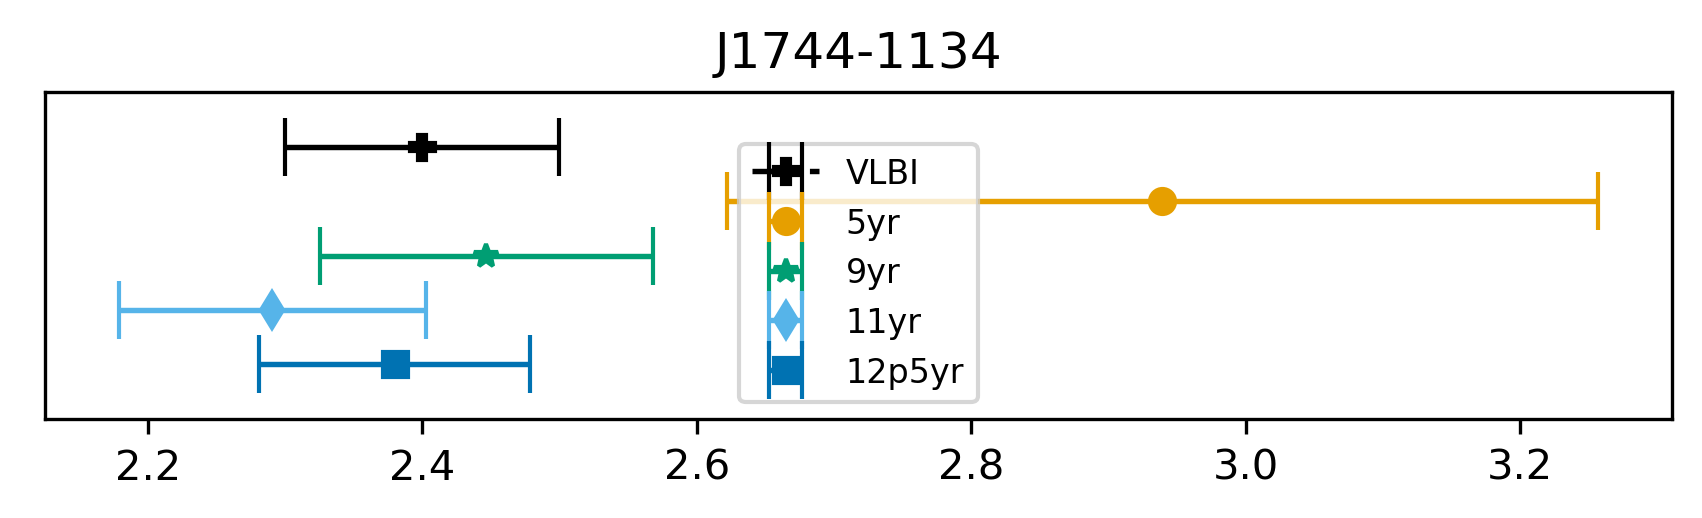

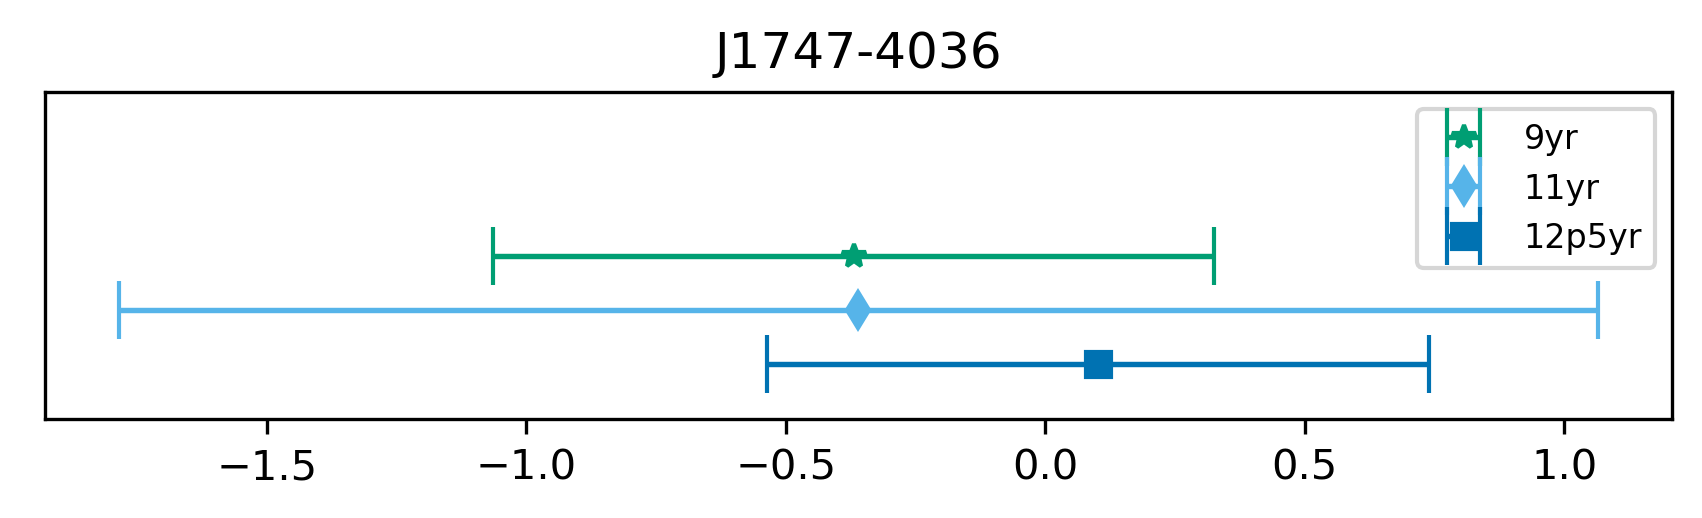

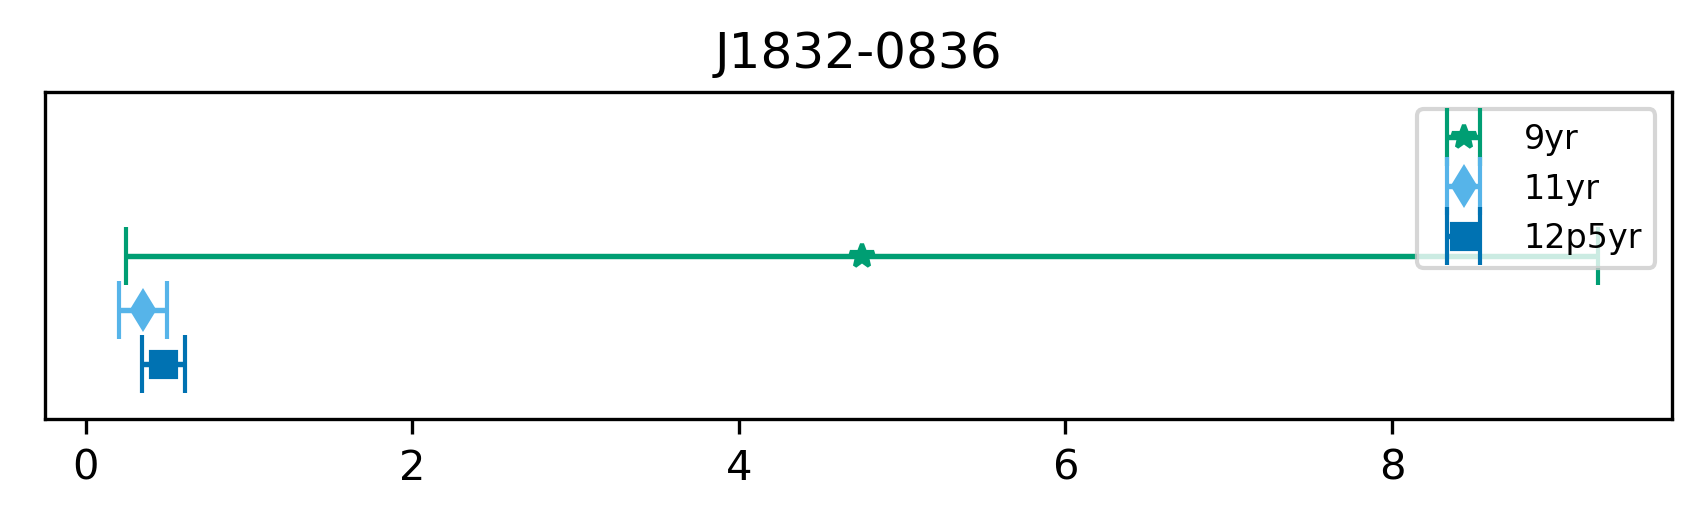

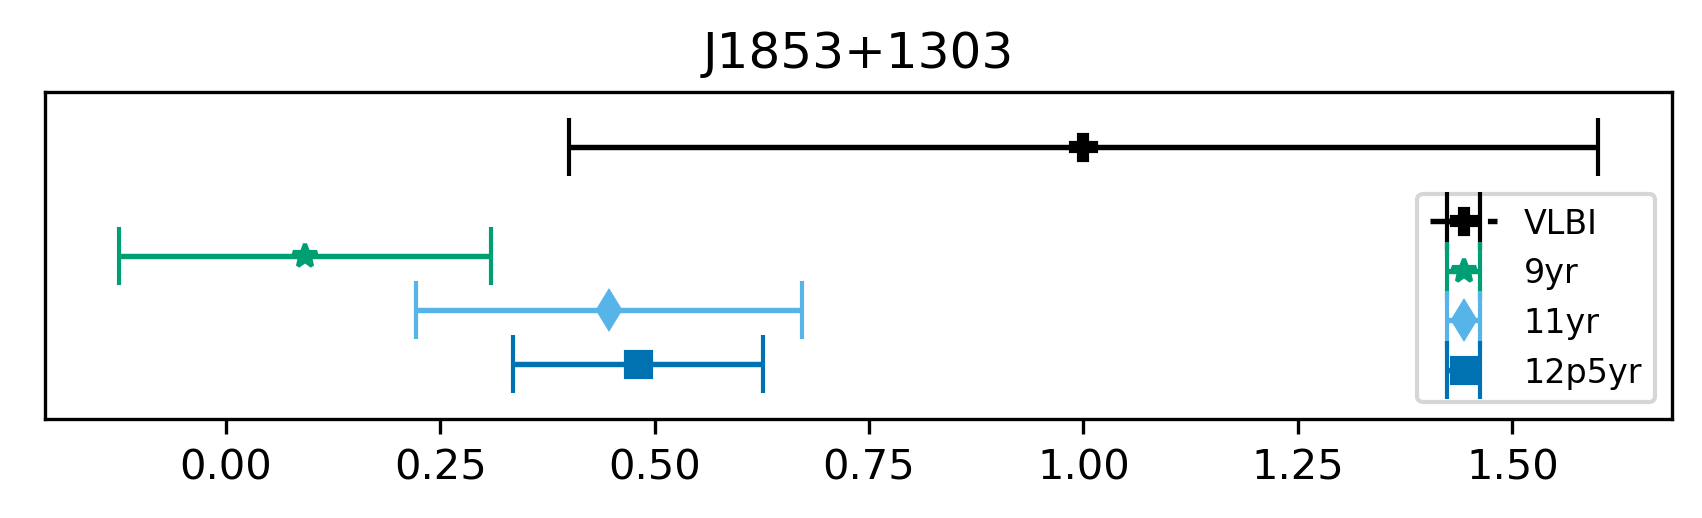

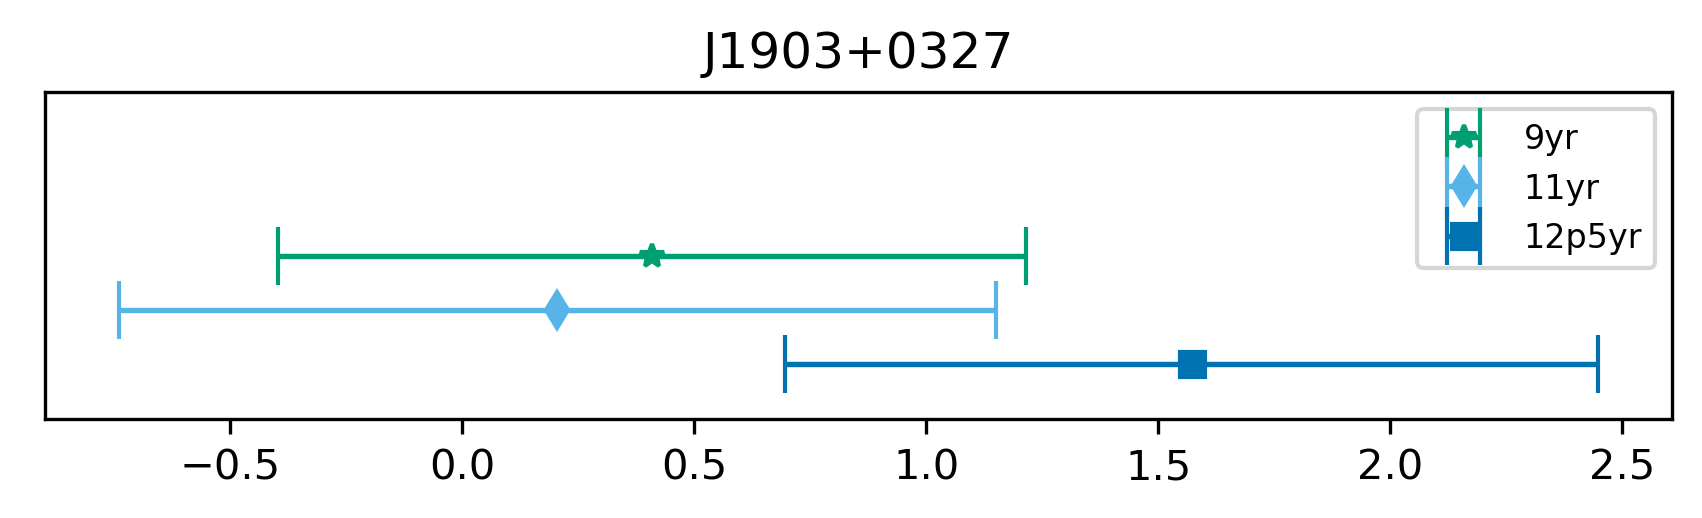

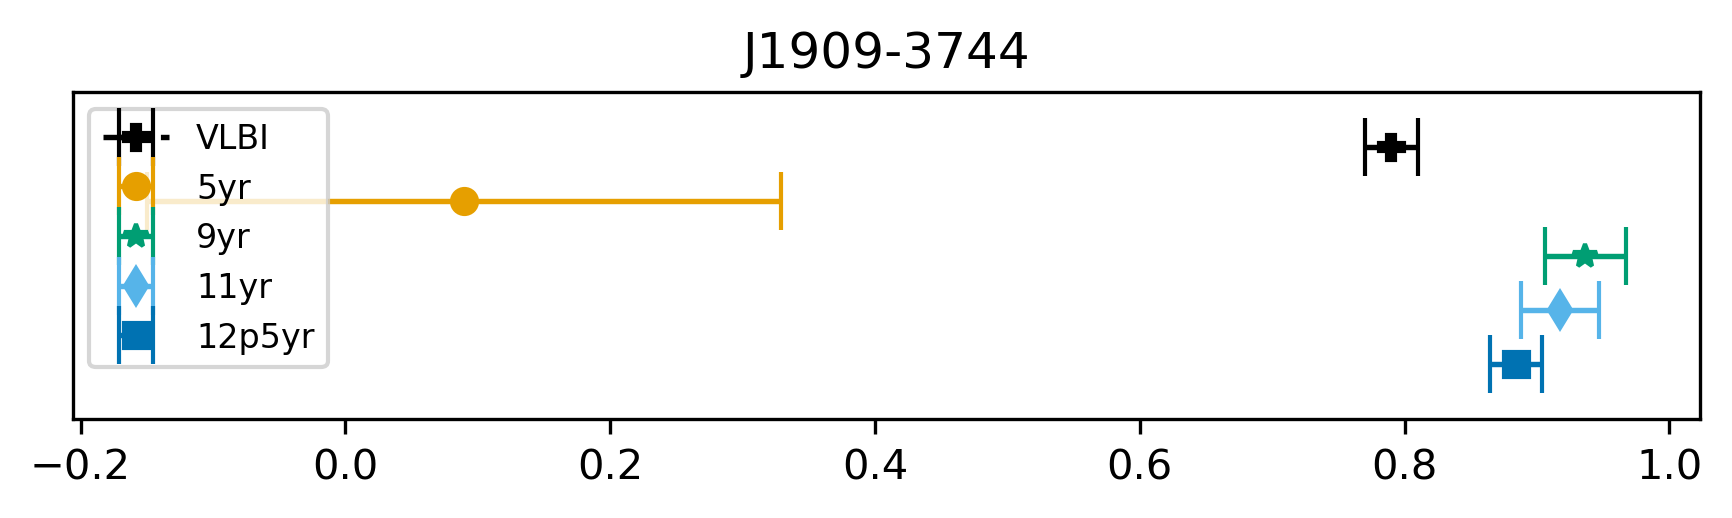

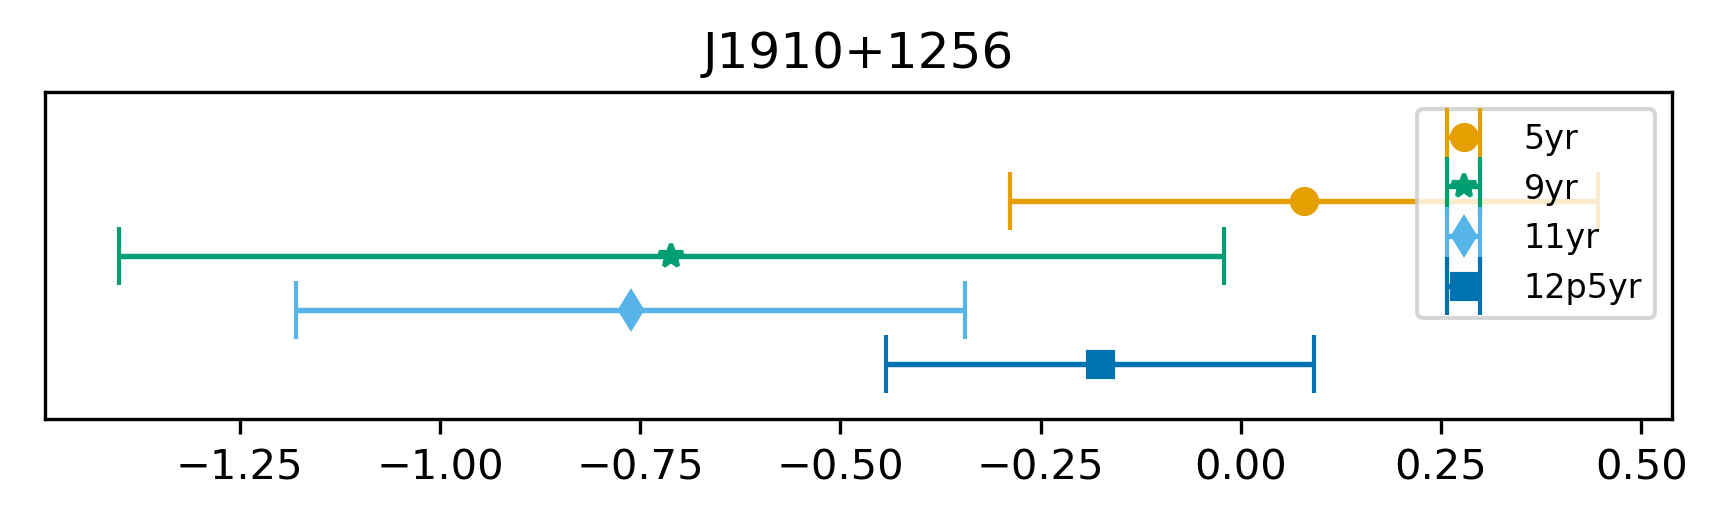

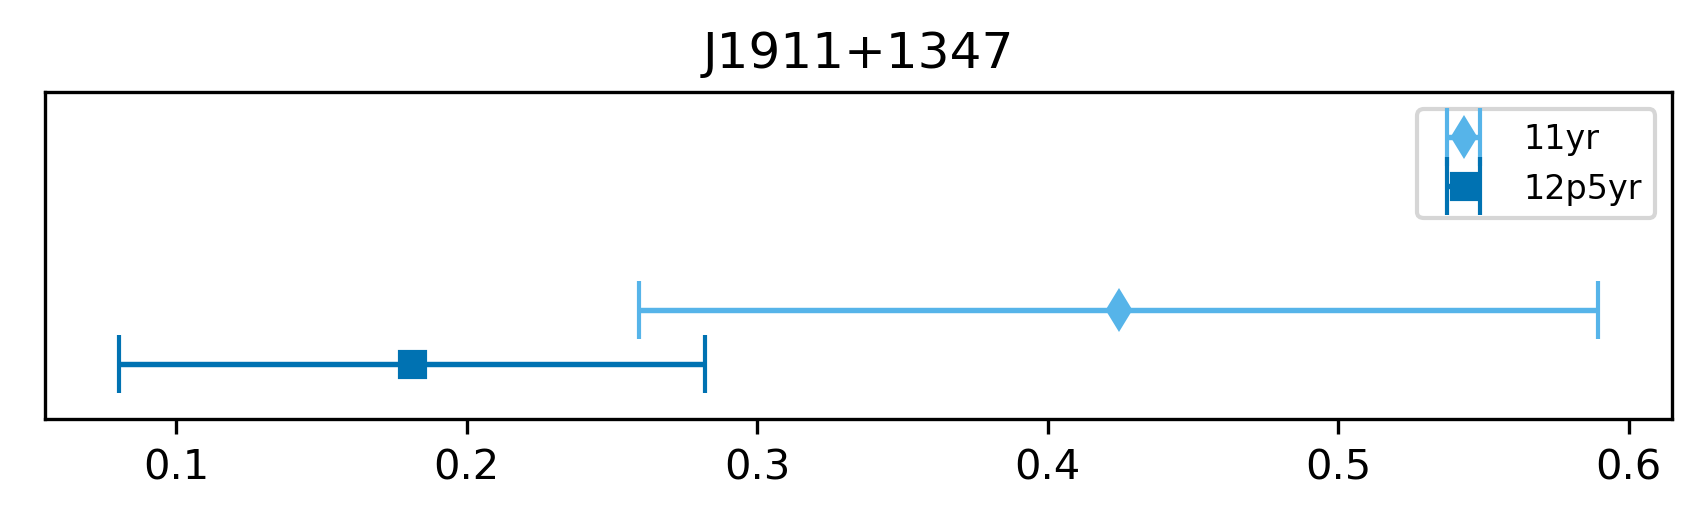

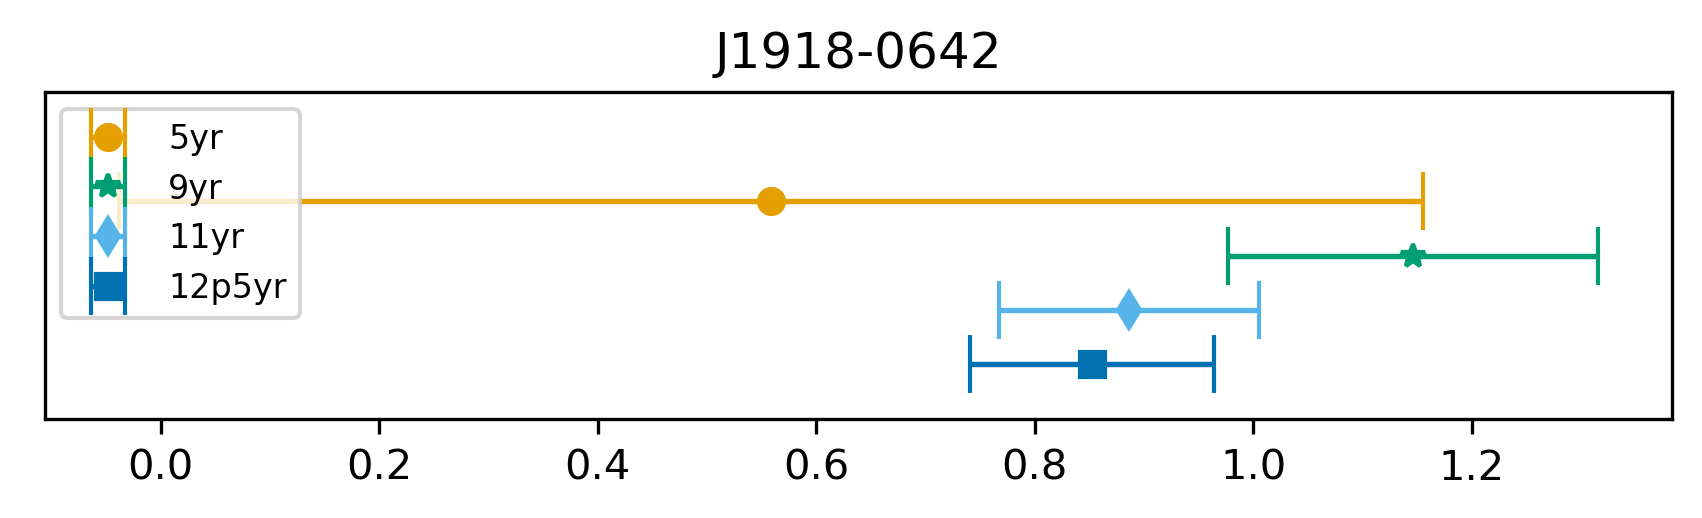

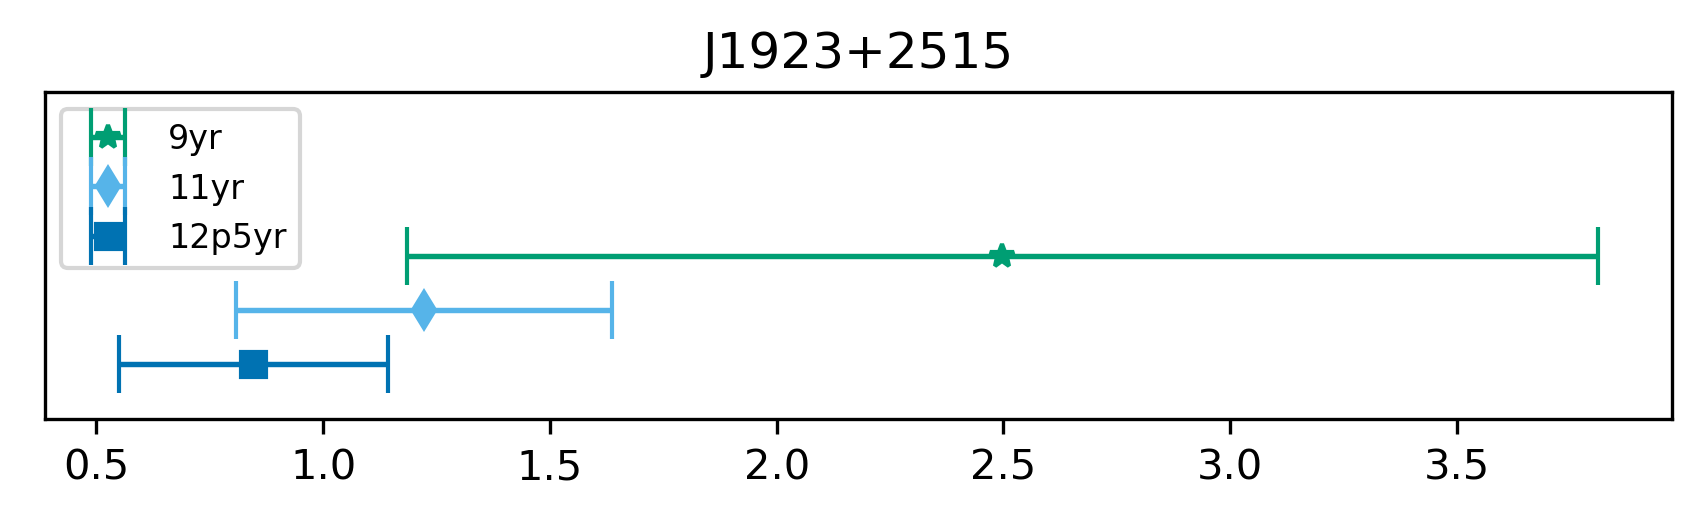

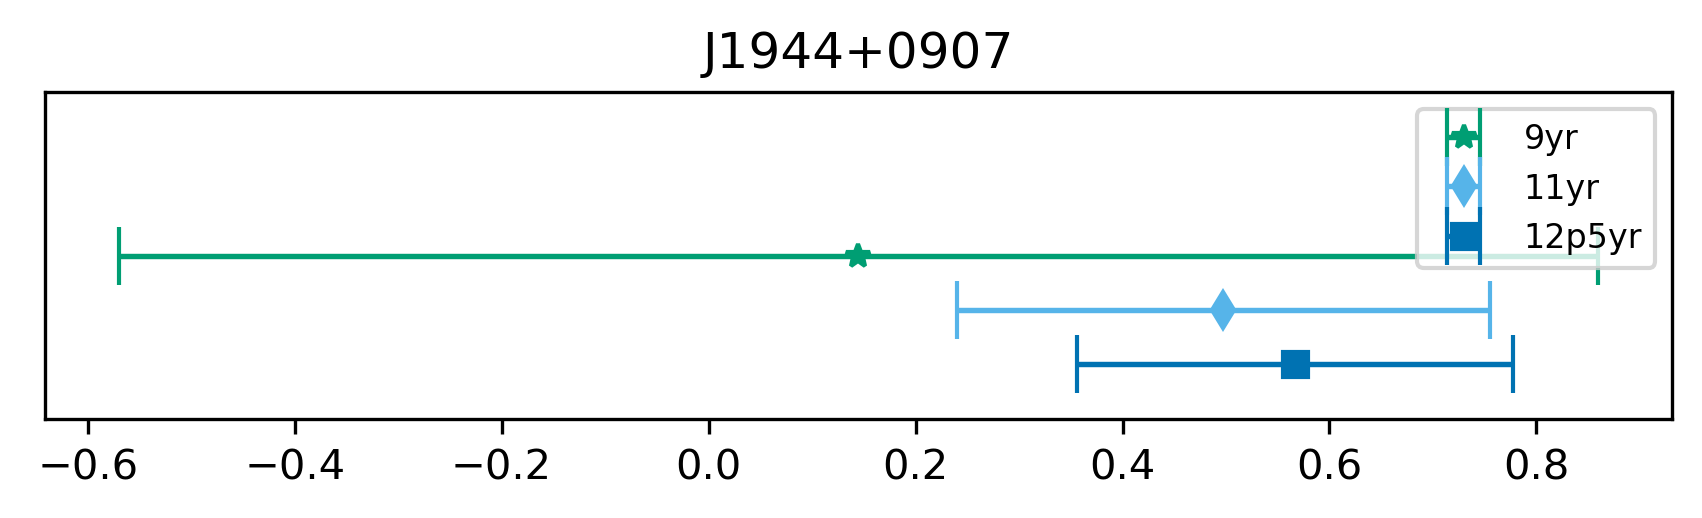

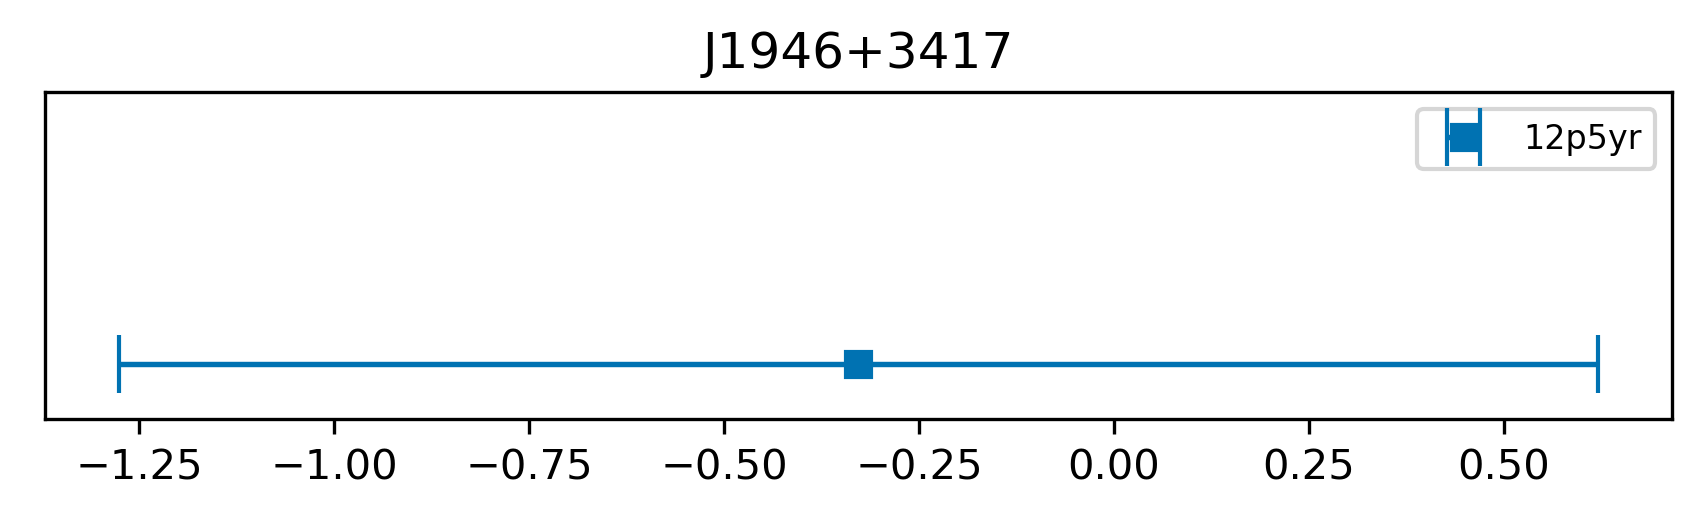

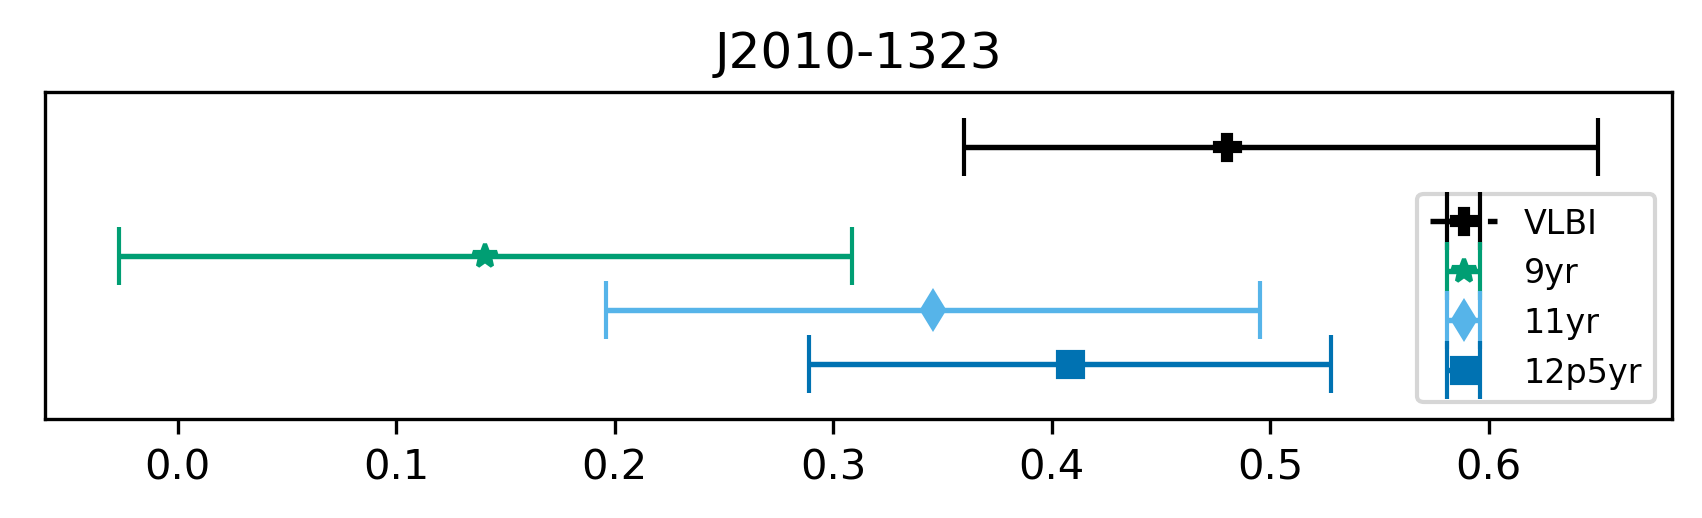

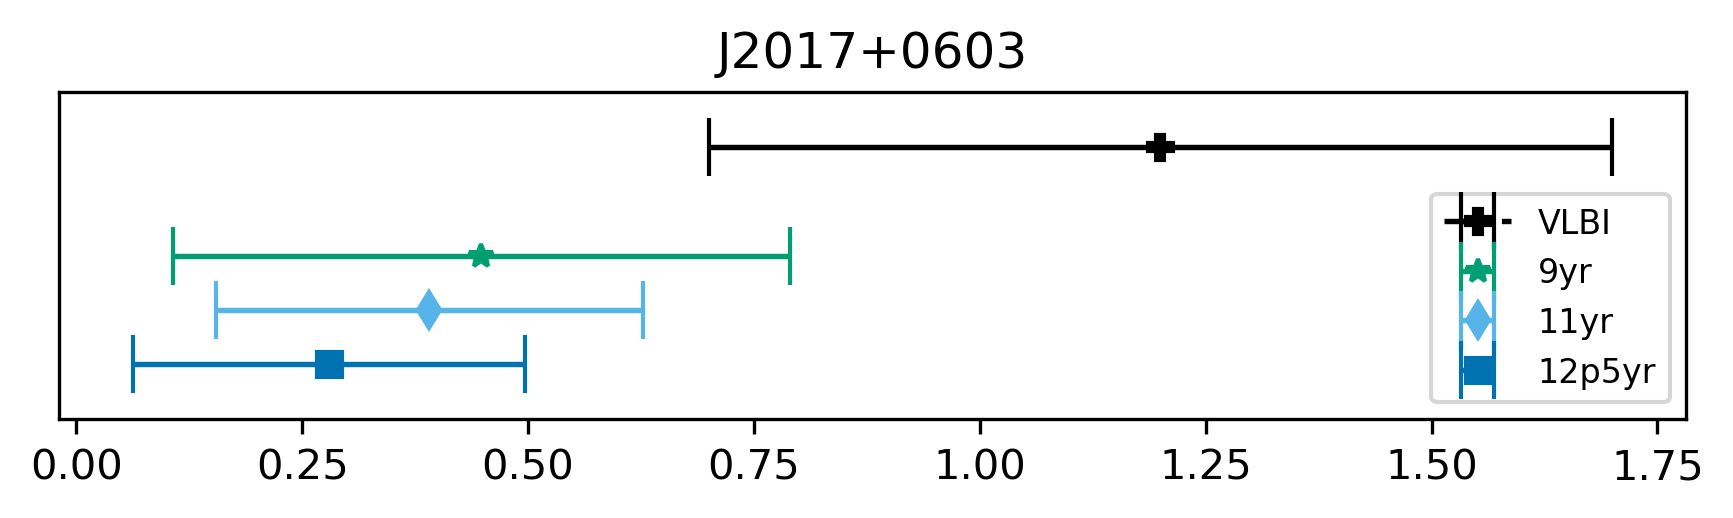

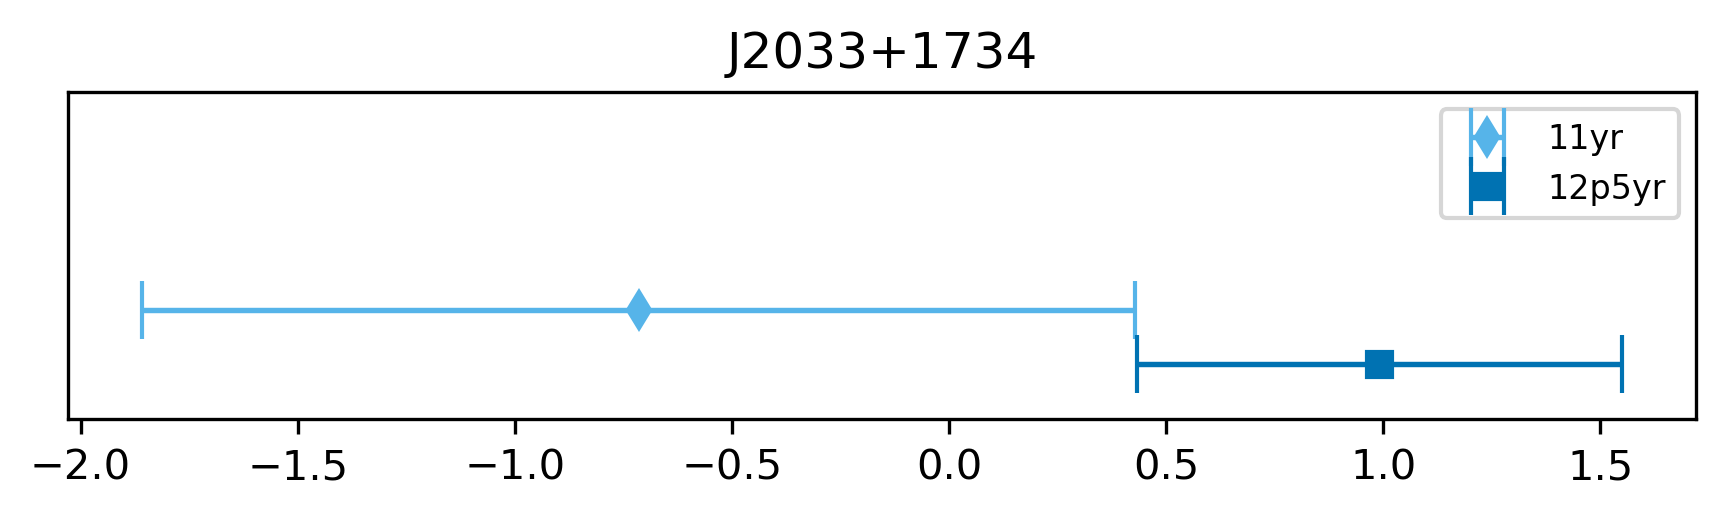

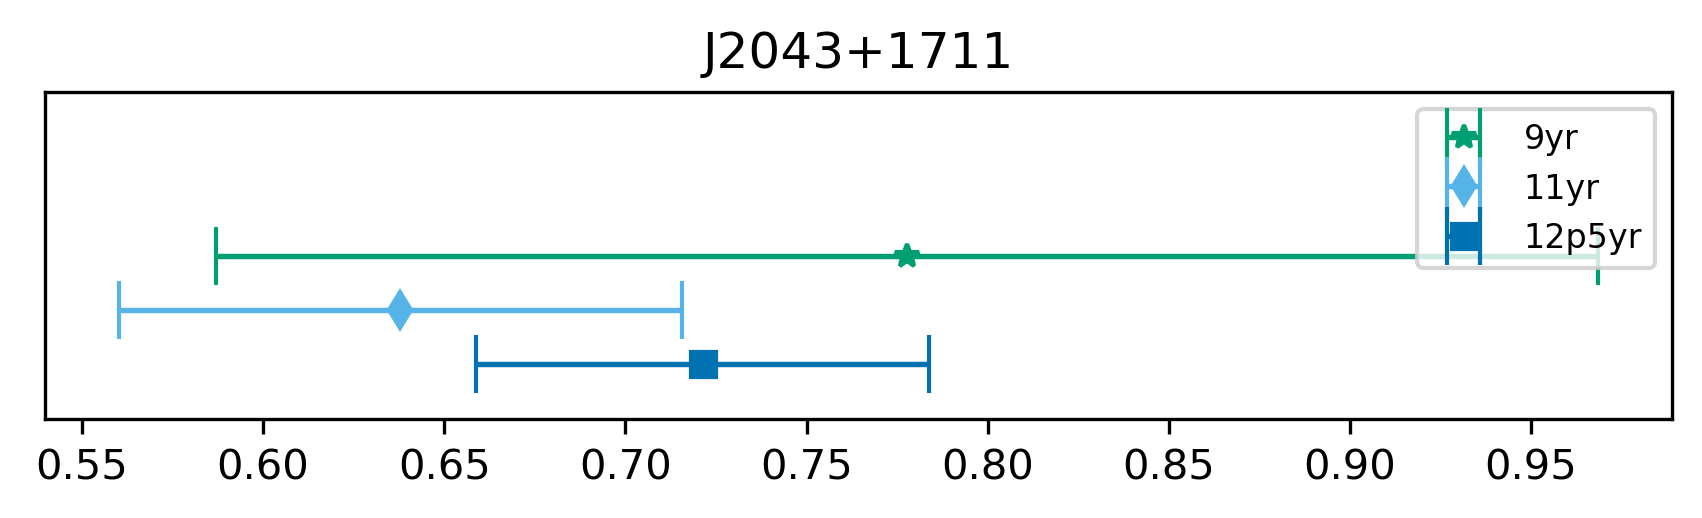

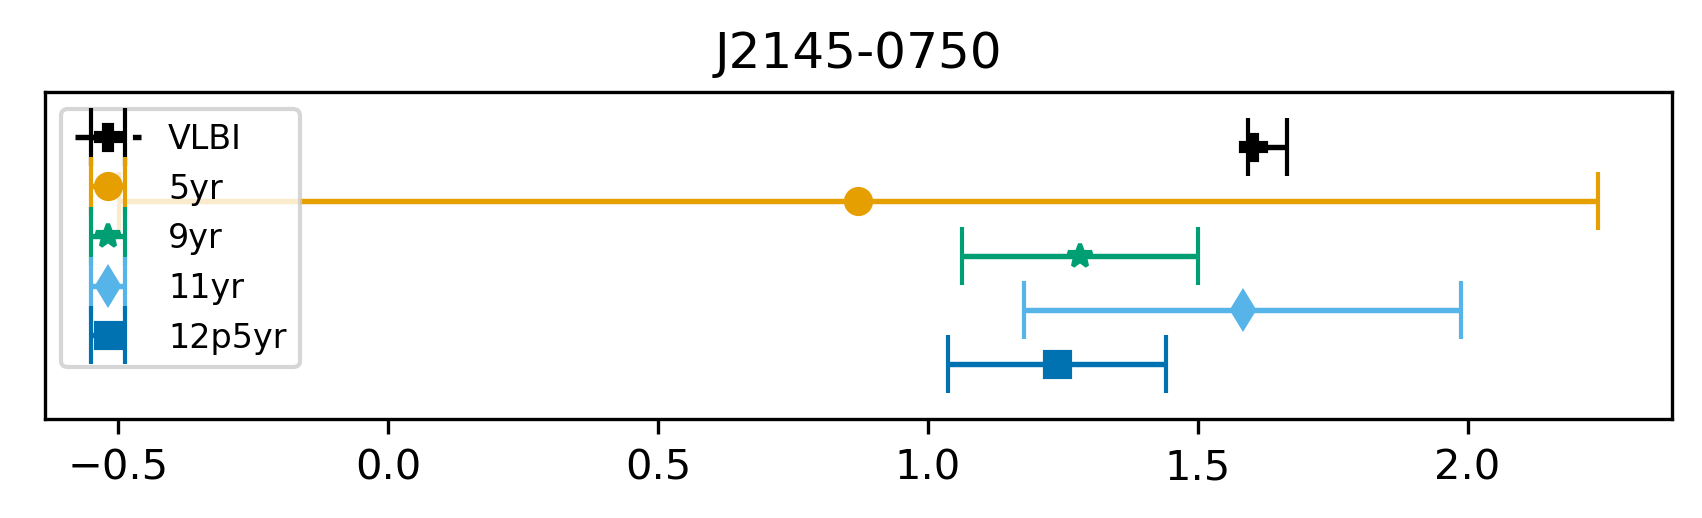

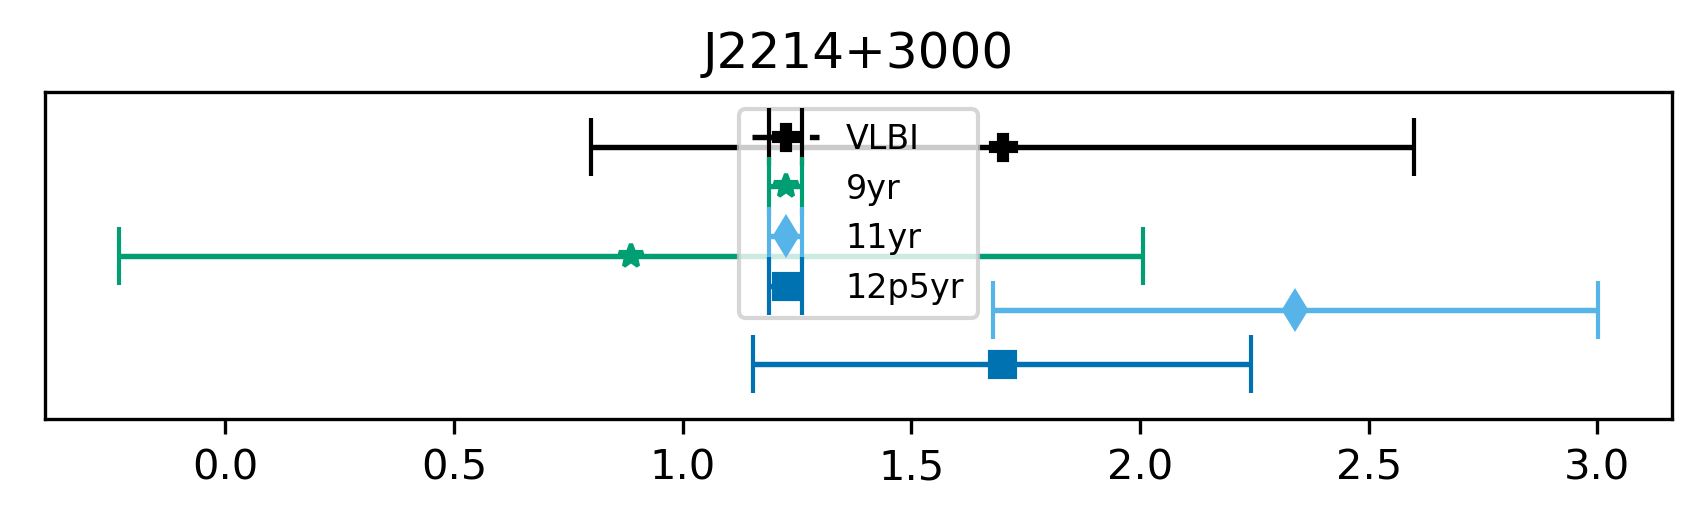

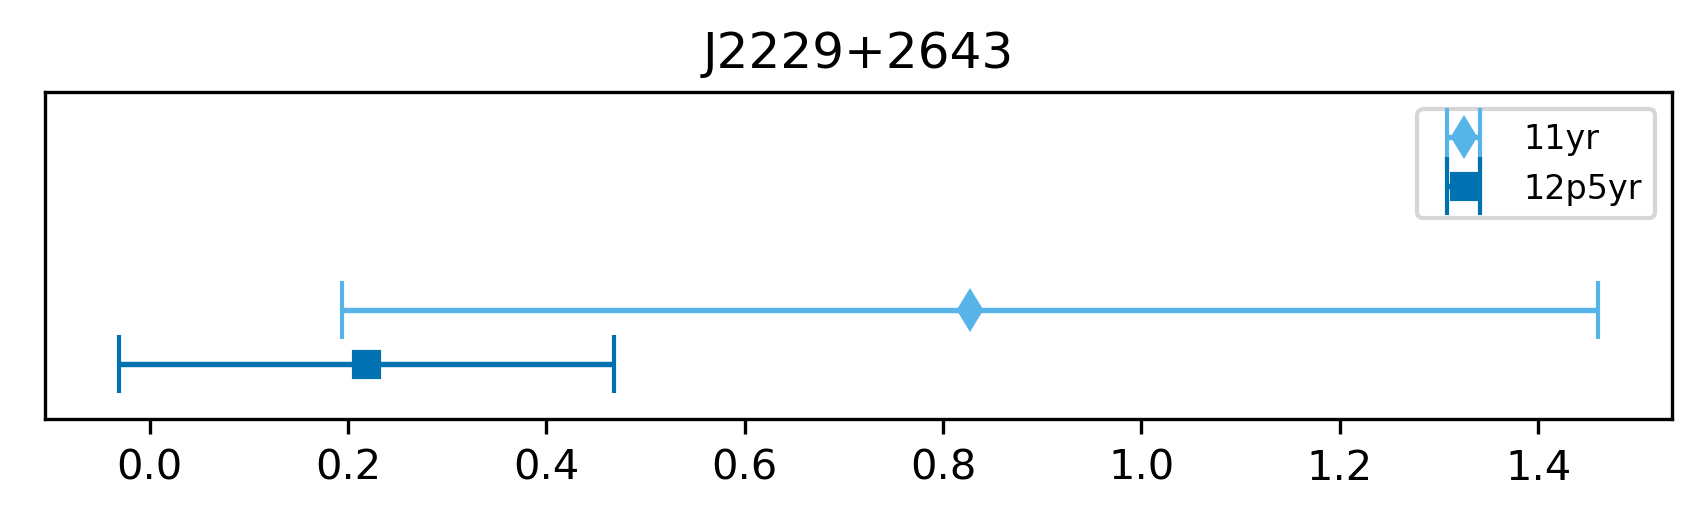

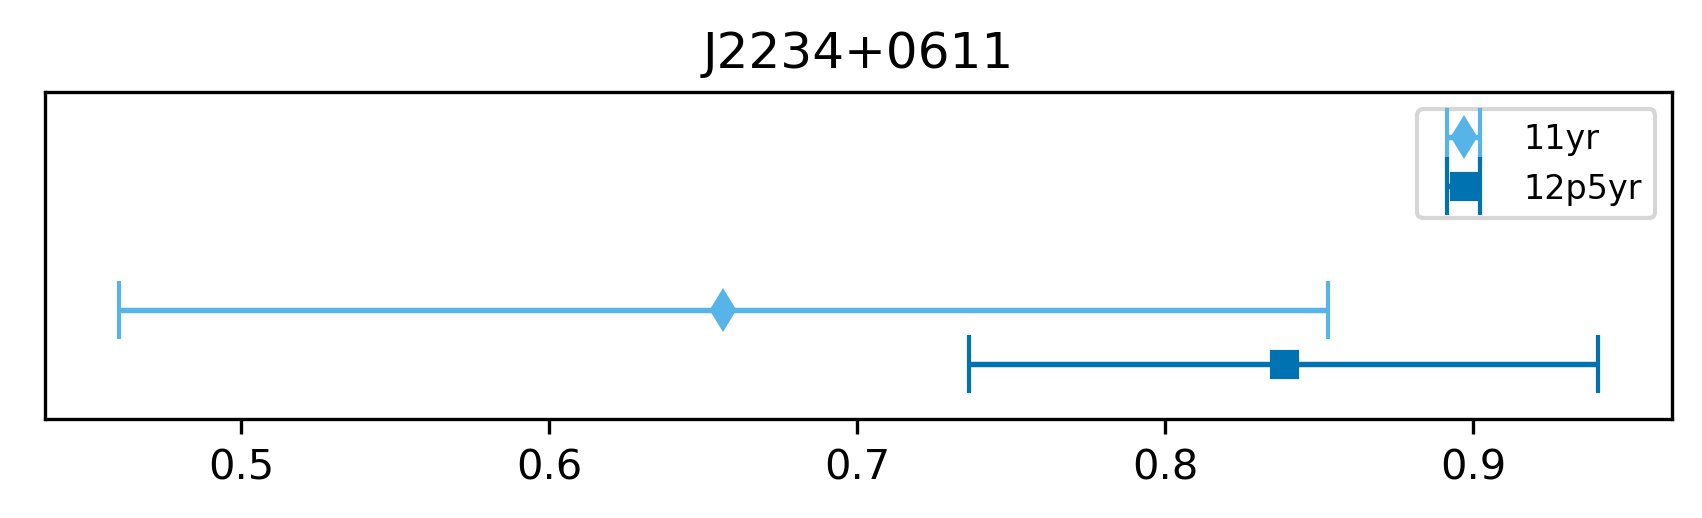

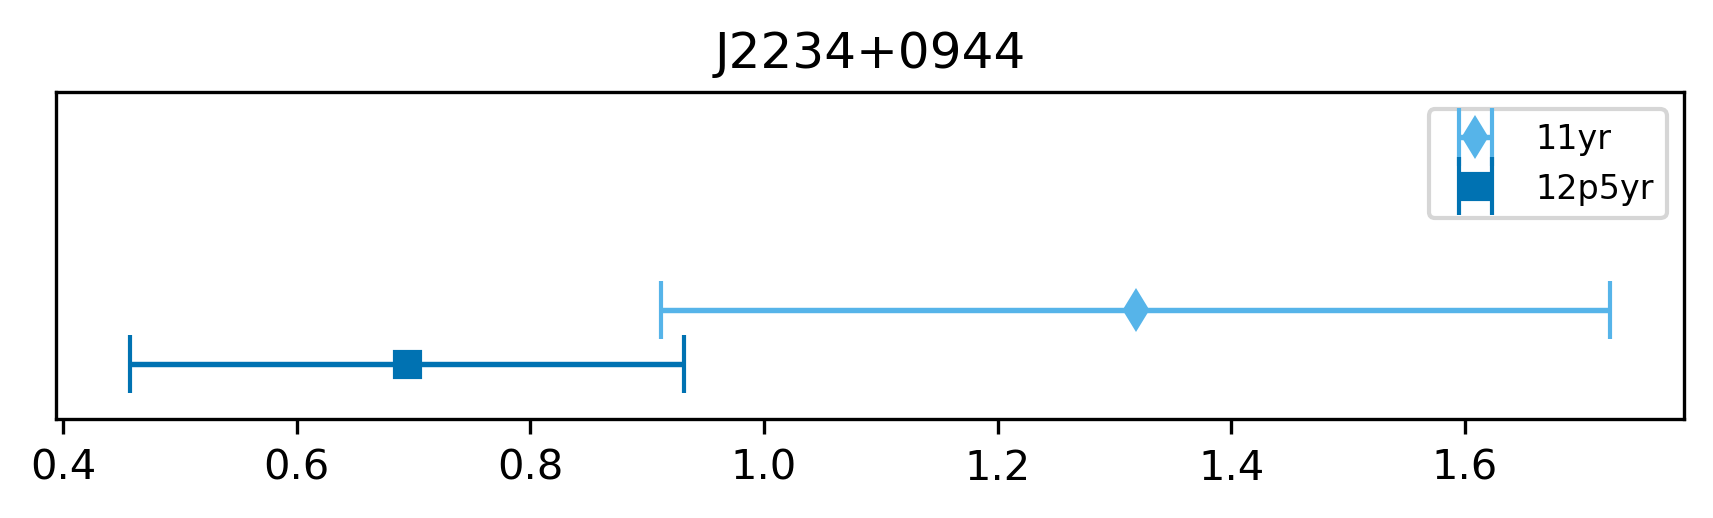

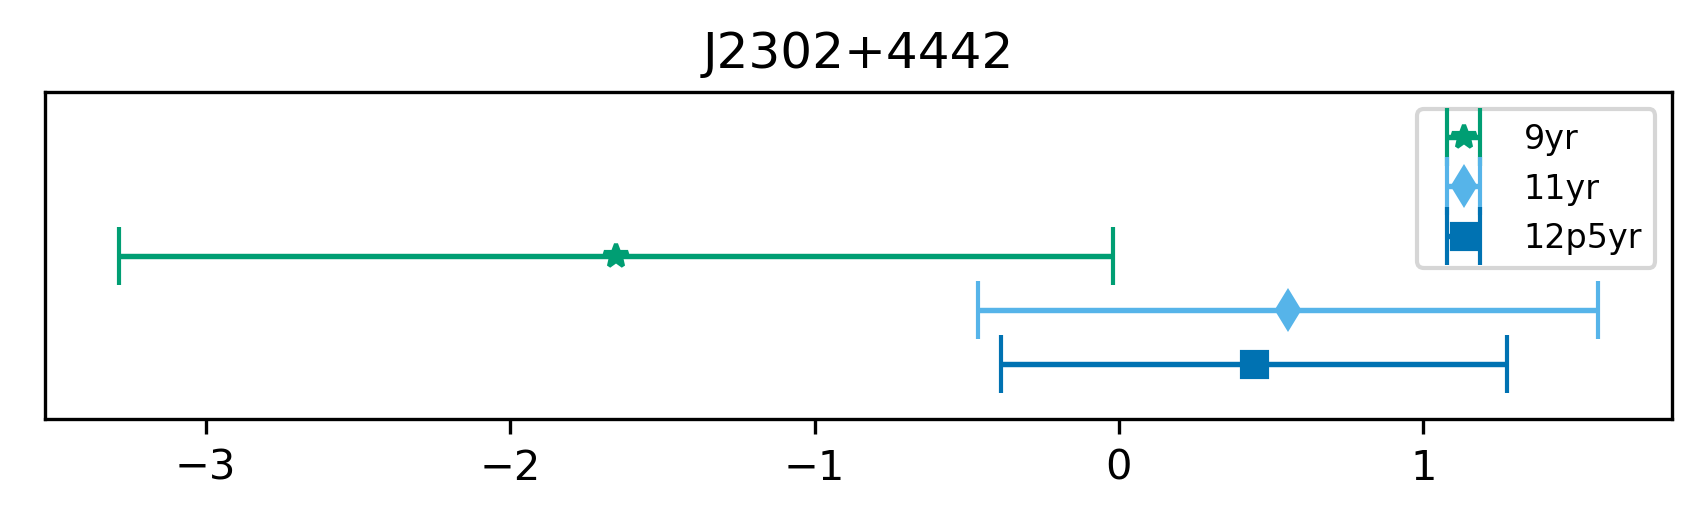

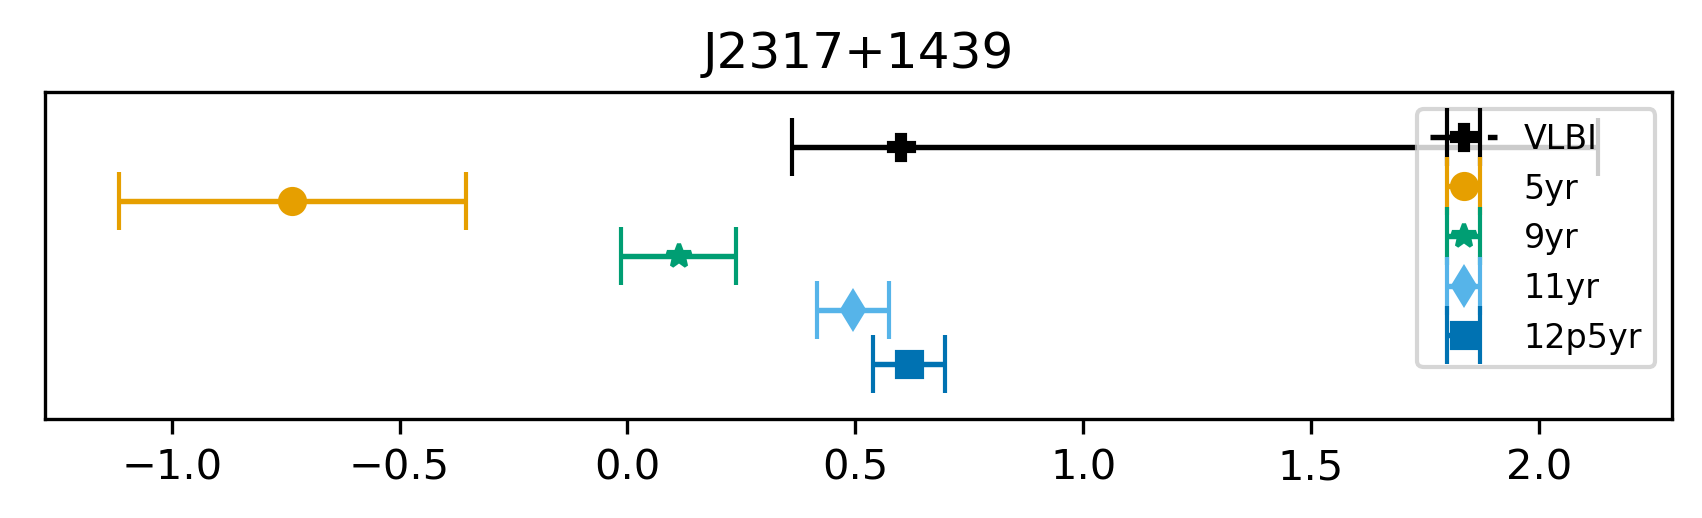

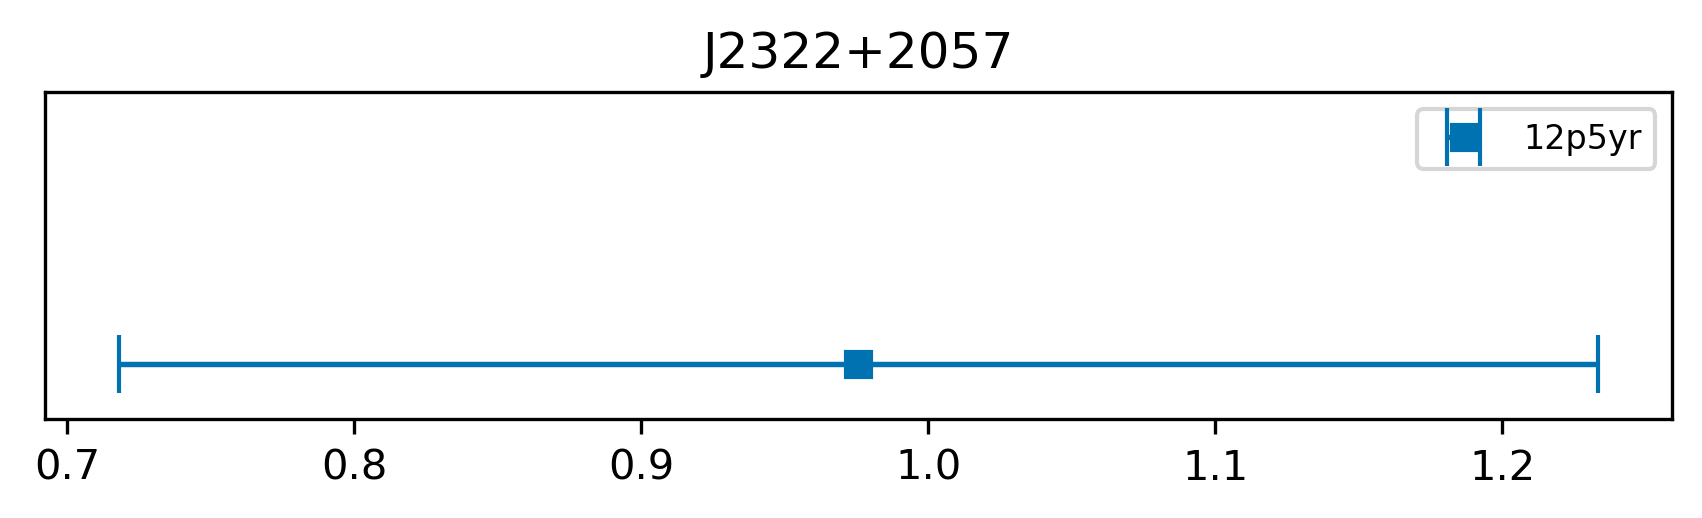

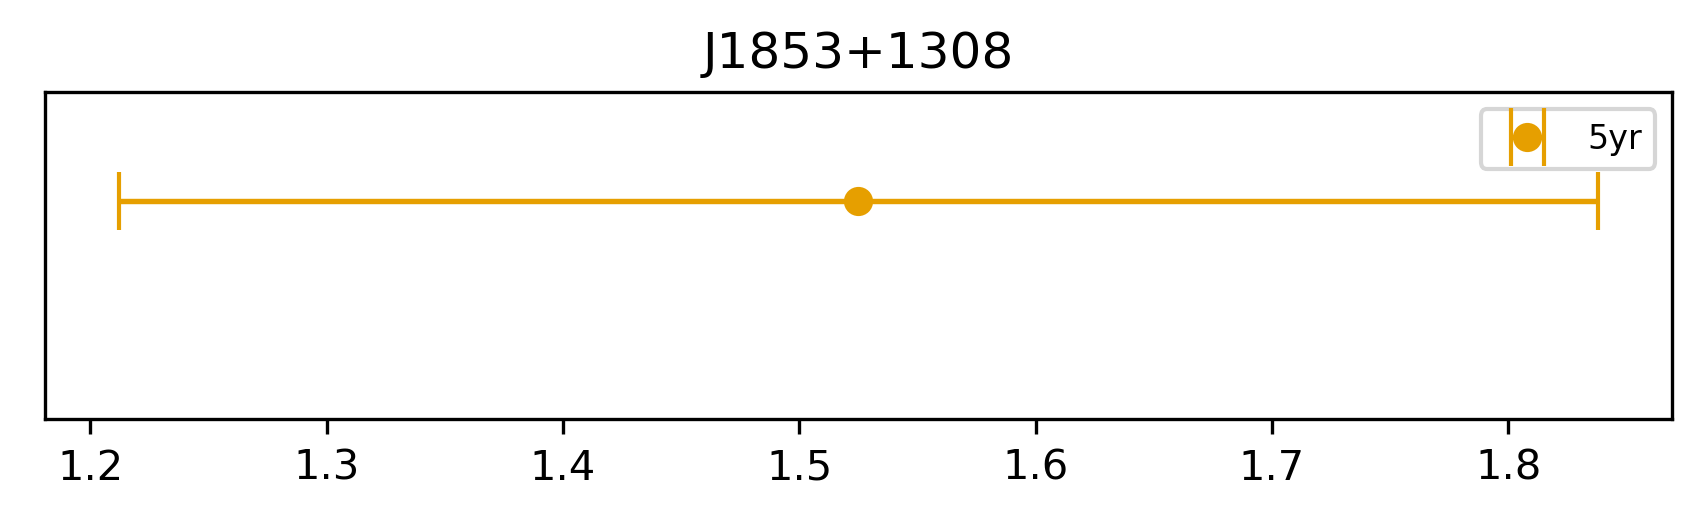

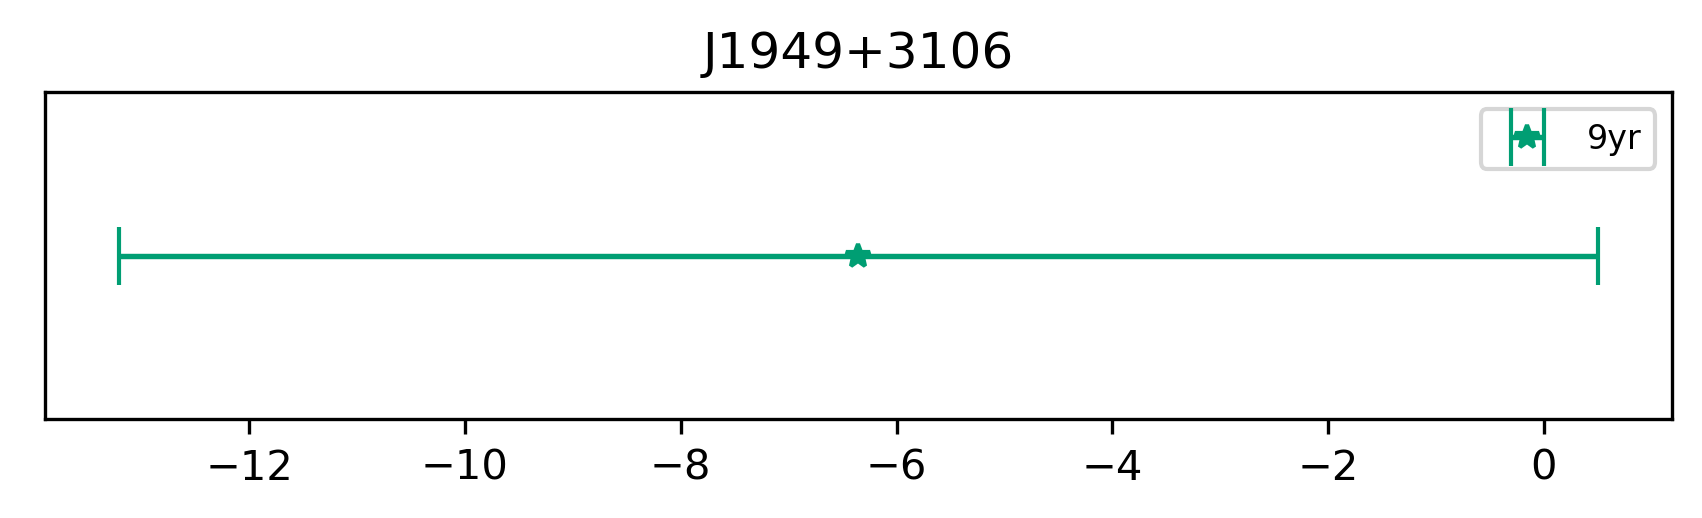

In [15]:
plotted_psrs = []
capsize = 7
i = 0
for psr in all_psrs:
    fig,ax = plt.subplots(figsize=get_fig_size(scale=3.0))
    ax.set_title(psr)
    
    if psr in astrometric_px.keys():
        ax.errorbar(float(astrometric_px[psr]['PI'][0]),4,
                     xerr=[np.array([np.abs(float(astrometric_px[psr]['eminus'][0]))]),
                           [np.abs(float(astrometric_px[psr]['eplus'][0]))]],
                     fmt = 'P', capsize = capsize, linestyle='--', label = 'VLBI', color = 'C0')
    if psr in px_par_5yr.keys():
        if 'val' in px_par_5yr[psr].keys() and 'err' in px_par_5yr[psr].keys():
            ax.errorbar(px_par_5yr[psr]['val'],3,xerr=px_par_5yr[psr]['err'],
                         fmt = 'o', capsize = capsize, label = '5yr', color = 'C1')
    if psr in px_par_9yr.keys():
        if 'val' in px_par_9yr[psr].keys() and 'err' in px_par_9yr[psr].keys():
            ax.errorbar(px_par_9yr[psr]['val'],2,xerr=px_par_9yr[psr]['err'],
                         fmt = '*', capsize = capsize, label = '9yr', color = 'C2')
    if psr in px_par_11yr.keys():
        if 'val' in px_par_11yr[psr].keys() and 'err' in px_par_11yr[psr].keys():
            ax.errorbar(px_par_11yr[psr]['val'],1,xerr=px_par_11yr[psr]['err'],
                         fmt = 'd', capsize = capsize, label = '11yr', color = 'C3')
    if psr in px_par_12p5yr.keys():
        if 'val' in px_par_12p5yr[psr].keys() and 'err' in px_par_12p5yr[psr].keys():
            ax.errorbar(px_par_12p5yr[psr]['val'],0,xerr=px_par_12p5yr[psr]['err'],
                         fmt = 's', capsize = capsize, label = '12p5yr', color = 'C4')
    plt.setp(plt.gca(), yticks=())
    plt.ylim([-1,5])
    plt.legend()
    #plt.savefig(save_dir+'/{}.pdf'.format(psr),dpi=300,bbox_inches='tight')
    plt.show()

#plt.grid(True, which = 'both')
#plt.subplots_adjust(hspace=.5)
#plt.show()

In [33]:
for psr in all_psrs:
    name_col = psr + ' &'
    if psr in astrometric_px.keys():
        if np.abs(1-np.abs(float(astrometric_px[psr]['eplus'][0])/float(astrometric_px[psr]['eminus'][0]))) > 1e-4:
            vlbi_col = '$ %.3f ^{+%.3f}_{-%.3f}$ &' %(float(astrometric_px[psr]['PI'][0]),
                                                   np.abs(float(astrometric_px[psr]['eplus'][0])),
                                                   np.abs(float(astrometric_px[psr]['eminus'][0])))
        else:
            vlbi_col = '$%.3f \pm %.3f$ &' %(float(astrometric_px[psr]['PI'][0]),
                                             np.abs(float(astrometric_px[psr]['eplus'][0])))
    else:
        vlbi_col = '-- &'
        
    if psr in px_par_5yr.keys():
        if 'val' in px_par_5yr[psr].keys() and 'err' in px_par_5yr[psr].keys():
            five_col = '$%.3f \pm %.3f$ &' %(px_par_5yr[psr]['val'],
                                              px_par_5yr[psr]['err'])
        else:
            five_col = '-- &'
    else:
        five_col = '-- &'
        
    if psr in px_par_9yr.keys():
        if 'val' in px_par_9yr[psr].keys() and 'err' in px_par_9yr[psr].keys():
            nine_col = '$%.3f \pm %.3f$ &' %(px_par_9yr[psr]['val'],
                                              px_par_9yr[psr]['err'])
        else:
            nine_col = '-- &'
    else:
        nine_col = '-- &'
        
    if psr in px_par_11yr.keys():
        if 'val' in px_par_11yr[psr].keys() and 'err' in px_par_11yr[psr].keys():
            eleven_col = '$%.3f \pm %.3f$ &' %(px_par_11yr[psr]['val'],
                                              px_par_11yr[psr]['err'])
        else:
            eleven_col = '-- &'
    else:
        eleven_col = '-- &'
        
    if psr in px_par_12p5yr.keys():
        if 'val' in px_par_12p5yr[psr].keys() and 'err' in px_par_12p5yr[psr].keys():
            twelvep5_col = '$%.3f \pm %.3f$' %(px_par_12p5yr[psr]['val'],
                                              px_par_12p5yr[psr]['err'])
        else:
            twelvep5_col = '--'
    else:
        twelvep5_col = '--'
    
    print(name_col,vlbi_col,five_col,nine_col,eleven_col,twelvep5_col,' \\\\')

B1855+09 & -- & $1.229 \pm 0.212$ & $0.293 \pm 0.219$ & $0.613 \pm 0.176$ & $0.716 \pm 0.122$  \\
B1937+21 & -- & -- & $0.101 \pm 0.120$ & $0.151 \pm 0.085$ & $0.282 \pm 0.051$  \\
B1953+29 & -- & $-2.701 \pm 2.402$ & $-1.691 \pm 1.249$ & $-0.676 \pm 1.231$ & $-0.135 \pm 0.601$  \\
J0023+0923 & -- & -- & $0.416 \pm 0.344$ & $0.930 \pm 0.156$ & $0.547 \pm 0.123$  \\
J0030+0451 & $3.300 \pm 0.900$ & $2.637 \pm 0.351$ & $3.286 \pm 0.155$ & $3.079 \pm 0.084$ & $3.090 \pm 0.059$  \\
J0340+4130 & -- & -- & $0.684 \pm 0.696$ & $0.714 \pm 0.436$ & $0.648 \pm 0.406$  \\
J0613-0200 & $0.800 \pm 0.350$ & $1.313 \pm 0.372$ & $0.907 \pm 0.151$ & $0.929 \pm 0.196$ & $0.903 \pm 0.116$  \\
J0636+5128 & -- & -- & -- & $0.883 \pm 0.301$ & $1.375 \pm 0.235$  \\
J0645+5158 & $1.400 \pm 0.400$ & -- & $1.263 \pm 0.312$ & $0.822 \pm 0.189$ & $0.819 \pm 0.162$  \\
J0740+6620 & -- & -- & -- & $2.298 \pm 0.648$ & $0.803 \pm 0.438$  \\
J0931-1902 & -- & -- & $8.466 \pm 7.923$ & $1.248 \pm 0.859$ & $0.652 \pm 0.6

In [ ]:
if psr in px_par_12p5yr.keys():
        if 'val' in px_par_12p5yr[psr].keys() and 'err' in px_par_12p5yr[psr].keys():
            twelvep5_col = '$ %.3f \pm %.3f$ &' %(px_par_12p5yr[psr]['val'],
                                              px_par_12p5yr[psr]['err'])
        else:
            print('eeeeeeeeeeeeeeeee')
            twelvep5_col = '-- &'
    else:
        twelvep5_col = '-- &'